In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Top1500.csv', sep=';')

In [3]:
len(df)

1500

In [4]:
df.head(7)

Position      Const   Created  Modified Description  \
0         1  tt0068646  3/4/2013  3/4/2013               
1         2  tt0034583  6/4/2013  6/4/2013               
2         3  tt0061722  6/4/2013  6/4/2013               
3         4  tt0033467  6/4/2013  6/4/2013               
4         5  tt0050083  6/4/2013  6/4/2013               
5         6  tt0047478  6/4/2013  6/4/2013               
6         7  tt0064116  6/4/2013  6/4/2013               

                     Title                                    URL Title Type  \
0            The Godfather  https://www.imdb.com/title/tt0068646/      movie   
1               Casablanca  https://www.imdb.com/title/tt0034583/      movie   
2             The Graduate  https://www.imdb.com/title/tt0061722/      movie   
3             Citizen Kane  https://www.imdb.com/title/tt0033467/      movie   
4             12 Angry Men  https://www.imdb.com/title/tt0050083/      movie   
5     Shichinin no samurai  https://www.imdb.com/title/tt0047478/      movie   
6  C'era una volta il West  https://www.imdb.com/title/tt0064116/      movie   

   IMDb Rating  Runtime (mins)  Year                  Genres  Num Votes  \
0          9.2             175  1972            Crime, Drama    2010770   
1          8.5             102  1942     Drama, Romance, War     605685   
2          8.0             106  1967  Comedy, Drama, Romance     288254   
3          8.3             119  1941          Drama, Mystery     465755   
4          9.0              96  1957            Crime, Drama     864234   
5          8.6             207  1954           Action, Drama     366611   
6          8.5             166  1968                 Western     348926   

  Release Date             Directors  
0    14/3/1972  Francis Ford Coppola  
1   26/11/1942        Michael Curtiz  
2   20/12/1967          Mike Nichols  
3     1/5/1941          Orson Welles  
4    10/4/1957          Sidney Lumet  
5    26/4/1954        Akira Kurosawa  
6   20/12/1968          Sergio Leone

In [5]:
df['Genres'].unique()

array(['Crime, Drama', 'Drama, Romance, War', 'Comedy, Drama, Romance',
       'Drama, Mystery', 'Action, Drama', 'Western',
       'Drama, Mystery, Thriller', 'Adventure, Family, Fantasy, Musical',
       'Action, Adventure, Fantasy, Sci-Fi',
       'Crime, Drama, Film-Noir, Mystery, Thriller',
       'Adventure, Biography, Drama, War', 'Biography, Drama, History',
       'Drama, Family, Fantasy, Romance', 'Drama, Romance',
       'Action, Adventure, Drama, Fantasy',
       'Action, Adventure, Mystery, Thriller', 'Drama', 'Comedy, Romance',
       'Biography, Crime, Drama, Thriller', 'Crime, Sci-Fi',
       'Mystery, Romance, Thriller', 'Adventure, Sci-Fi',
       'Biography, Drama, Sport', 'Horror, Mystery, Thriller',
       'Comedy, Music, Romance', 'Comedy, Musical, Romance', 'Drama, War',
       'Comedy, Drama', 'Comedy', 'Drama, Sport',
       'Action, Adventure, Comedy, Drama, War',
       'Animation, Adventure, Drama, Family, Musical', 'Drama, Fantasy',
       'Crime, Drama, Th

In [6]:
df.isna().sum()


Position          0
Const             0
Created           0
Modified          0
Description       0
Title             0
URL               0
Title Type        0
IMDb Rating       0
Runtime (mins)    0
Year              0
Genres            0
Num Votes         0
Release Date      0
Directors         0
dtype: int64

In [7]:
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Position          0.0
Const             0.0
Created           0.0
Modified          0.0
Description       0.0
Title             0.0
URL               0.0
Title Type        0.0
IMDb Rating       0.0
Runtime (mins)    0.0
Year              0.0
Genres            0.0
Num Votes         0.0
Release Date      0.0
Directors         0.0
dtype: float64

In [8]:
df.groupby('Title')['Genres'].count().sort_values(ascending=False)

Title
The Ten Commandments            2
Monkey Business                 2
Scarface                        2
The Ladykillers                 2
King Kong                       2
                               ..
Holiday                         1
Hold That Ghost                 1
Hobson's Choice                 1
History of the World: Part I    1
À bout de souffle               1
Name: Genres, Length: 1487, dtype: int64

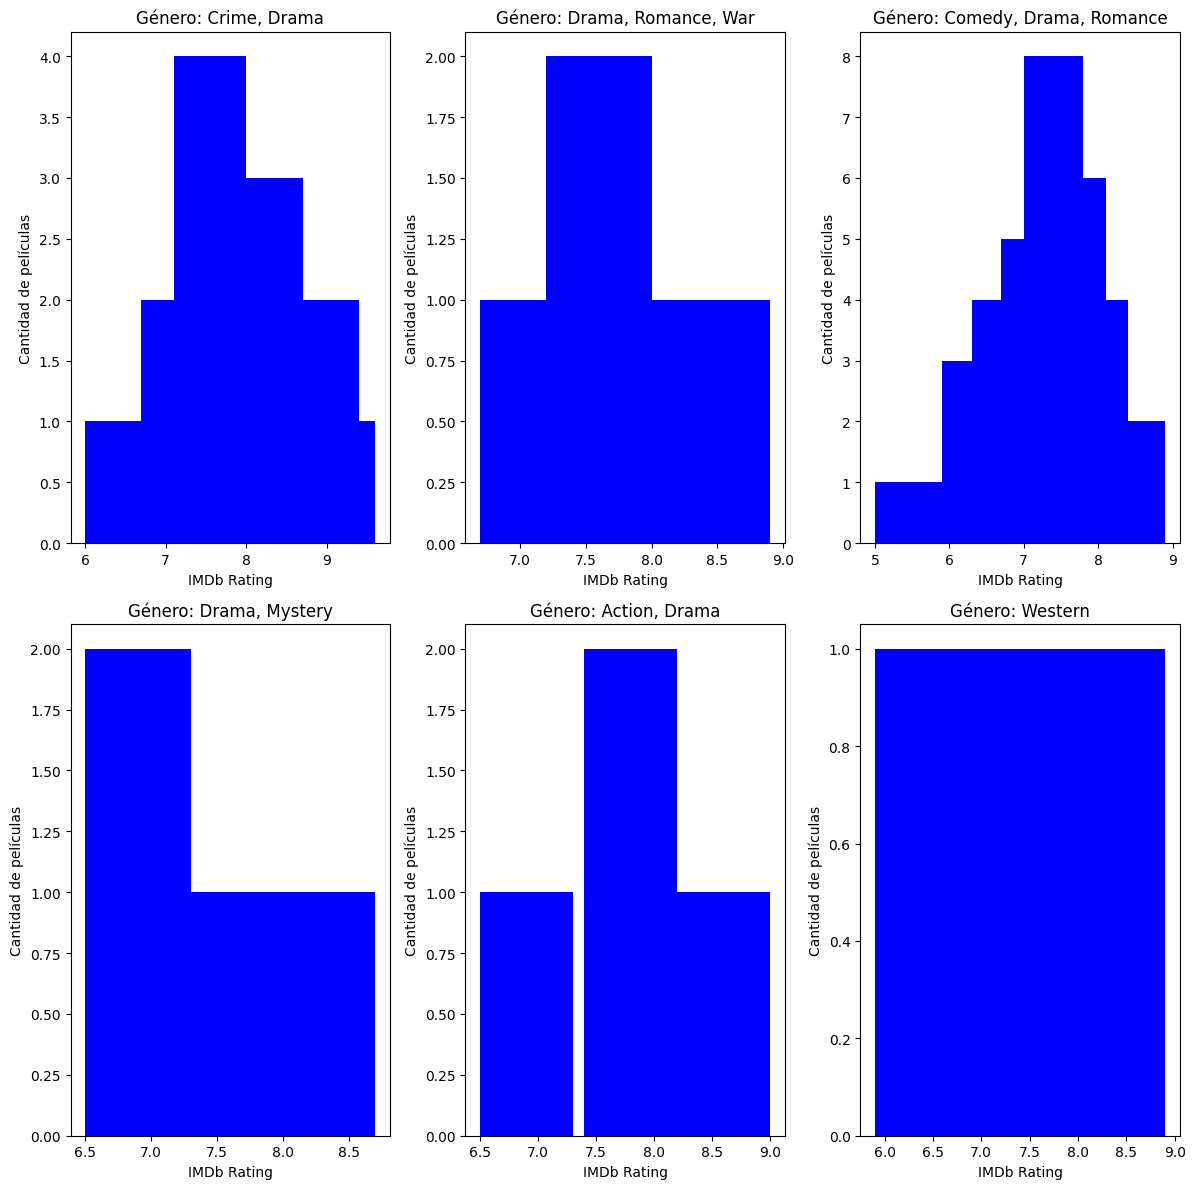

In [9]:
# Obtener los géneros únicos (puedes limitar la cantidad si hay demasiados)
genres = df['Genres'].unique()[:6]  # Solo tomamos los primeros 6 géneros para evitar sobrecarga en la visualización

plt.figure(figsize=(12, 12))

for i, genre in enumerate(genres):
    plt.subplot(2, 3, i + 1)  # 2 filas, 3 columnas

    # Filtrar el DataFrame por género
    genre_df = df[df['Genres'] == genre]

    # Contar cuántas películas hay en cada rango de IMDb Rating
    rating_counts = genre_df['IMDb Rating'].value_counts().sort_index()

    # Crear el gráfico de barras
    plt.bar(rating_counts.index, rating_counts.values, color='blue')
    plt.xlabel('IMDb Rating')
    plt.ylabel('Cantidad de películas')
    plt.title(f'Género: {genre}')

plt.tight_layout()
plt.show()


In [10]:
new_df = df[df['IMDb Rating'] == df['IMDb Rating'].min()]

# Mostrar las películas con su género
new_df[['Title', 'Genres','IMDb Rating']]

Title  Genres  IMDb Rating
1049  Casino Royale  Comedy          5.0

In [11]:
# Filtrar la película con la mayor calificación IMDb
new_df = df[df['IMDb Rating'] == df['IMDb Rating'].max()]

# Mostrar el título, género e IMDb de la película con la mayor calificación
new_df[['Title', 'Genres', 'IMDb Rating']]

Title Genres  IMDb Rating
53  The Shawshank Redemption  Drama          9.3

In [12]:
# Filtrar la película con la mayor calificación IMDb
new_df = df[df['IMDb Rating'] == df['IMDb Rating'].max()]

# Mostrar el director de la película con la mayor calificación IMDb
new_df[['Title', 'Directors', 'IMDb Rating']]

Title       Directors  IMDb Rating
53  The Shawshank Redemption  Frank Darabont          9.3

In [13]:
# Filtrar las películas con la mayor calificación IMDb
new_df = df[df['IMDb Rating'] == df['IMDb Rating'].max()]

# Mostrar las URLs de las películas con la mayor calificación IMDb
new_df[['Title', 'URL', 'IMDb Rating']]

Title                                    URL  \
53  The Shawshank Redemption  https://www.imdb.com/title/tt0111161/   

    IMDb Rating  
53          9.3

In [14]:
# Definir la asociación de géneros con emociones
genre_to_mood = {
    "Action": "Emoción fuerte, adrenalina",
    "Adventure": "Aventura, emoción",
    "Animation": "Diversión, alegría",
    "Biography": "Inspiración, reflexión",
    "Comedy": "Felicidad, risa",
    "Crime": "Tensión, intriga",
    "Drama": "Tristeza, reflexión",
    "Family": "Alegría, calidez",
    "Fantasy": "Asombro, escapismo",
    "Film-Noir": "Misterio, melancolía",
    "History": "Reflexión, nostalgia",
    "Horror": "Miedo, tensión",
    "Music": "Inspiración, alegría",
    "Musical": "Alegría, diversión",
    "Mystery": "Intriga, curiosidad",
    "Romance": "Amor, felicidad",
    "Sci-Fi": "Asombro, curiosidad",
    "Sport": "Motivación, emoción",
    "Thriller": "Tensión, suspense",
    "War": "Tristeza, reflexión",
    "Western": "Aventura, nostalgia"
}

# Filtrar las películas con la mayor calificación IMDb
max_rating = df['IMDb Rating'].max()
new_df = df[df['IMDb Rating'] == max_rating].copy()  # Usar .copy() para evitar la advertencia

# Asociar los géneros con las emociones
new_df.loc[:, 'Mood'] = new_df['Genres'].apply(
    lambda genres: [genre_to_mood.get(genre.strip(), "Desconocido") for genre in genres.split(",")]
)

# Mostrar las URLs de las películas con la mayor calificación IMDb y sus emociones asociadas
new_df[['Title', 'URL', 'IMDb Rating', 'Genres', 'Mood']]

Title                                    URL  \
53  The Shawshank Redemption  https://www.imdb.com/title/tt0111161/   

    IMDb Rating Genres                   Mood  
53          9.3  Drama  [Tristeza, reflexión]

In [15]:
# Obtener las primeras 7 películas
top_7_movies = df.head(200).copy()  # Usar .copy() para evitar la advertencia

# Asociar los géneros con las emociones
top_7_movies.loc[:, 'Mood'] = top_7_movies['Genres'].apply(
    lambda genres: [genre_to_mood.get(genre.strip(), "Desconocido") for genre in genres.split(",")]
)

# Mostrar las películas con sus géneros y emociones asociadas
top_7_movies[['Title', 'Genres', 'Mood']]

Title                            Genres  \
0                      The Godfather                      Crime, Drama   
1                         Casablanca               Drama, Romance, War   
2                       The Graduate            Comedy, Drama, Romance   
3                       Citizen Kane                    Drama, Mystery   
4                       12 Angry Men                      Crime, Drama   
..                               ...                               ...   
195                       White Heat   Action, Crime, Drama, Film-Noir   
196                     Mary Poppins  Comedy, Family, Fantasy, Musical   
197                  Sophie's Choice                    Drama, Romance   
198                        King Kong                 Adventure, Horror   
199  Un long dimanche de fiançailles      Drama, Mystery, Romance, War   

                                                  Mood  
0              [Tensión, intriga, Tristeza, reflexión]  
1    [Tristeza, reflexión, Amor, felicidad, Tristez...  
2    [Felicidad, risa, Tristeza, reflexión, Amor, f...  
3           [Tristeza, reflexión, Intriga, curiosidad]  
4              [Tensión, intriga, Tristeza, reflexión]  
..                                                 ...  
195  [Emoción fuerte, adrenalina, Tensión, intriga,...  
196  [Felicidad, risa, Alegría, calidez, Asombro, e...  
197             [Tristeza, reflexión, Amor, felicidad]  
198                [Aventura, emoción, Miedo, tensión]  
199  [Tristeza, reflexión, Intriga, curiosidad, Amo...  

[200 rows x 3 columns]

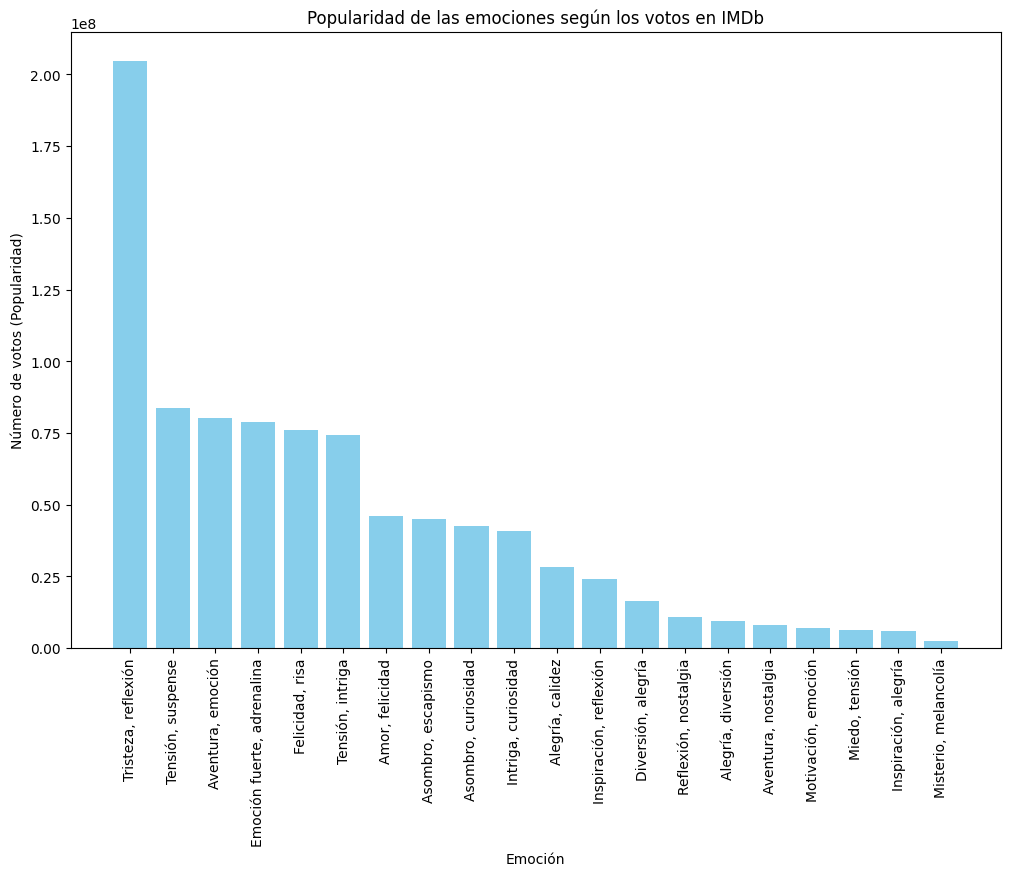

Top 5 películas más populares para la emoción: Tristeza, reflexión
                        Title                          Genres  \
53   The Shawshank Redemption                           Drama   
121           The Dark Knight  Action, Crime, Drama, Thriller   
101                Fight Club                           Drama   
15               Forrest Gump                  Drama, Romance   
8                Pulp Fiction                    Crime, Drama   

                    Mood  Num Votes  
53   Tristeza, reflexión    2886519  
121  Tristeza, reflexión    2868662  
101  Tristeza, reflexión    2321599  
15   Tristeza, reflexión    2255054  
8    Tristeza, reflexión    2218269  


In [16]:
# Asociar emociones a las películas
df['Mood'] = df['Genres'].apply(
    lambda genres: [genre_to_mood.get(genre.strip(), "Desconocido") for genre in genres.split(",")]
)

# Expandir la lista de emociones en filas separadas
df_expanded = df.explode('Mood')

# Agrupar por emociones y sumar los votos
mood_popularity = df_expanded.groupby('Mood')['Num Votes'].sum().reset_index()

# Ordenar por popularidad (número de votos)
mood_popularity = mood_popularity.sort_values(by='Num Votes', ascending=False)

# Función para graficar la popularidad de las emociones
def plot_mood_popularity():
    plt.figure(figsize=(12, 8))
    plt.bar(mood_popularity['Mood'], mood_popularity['Num Votes'], color='skyblue')
    plt.xticks(rotation=90)
    plt.xlabel('Emoción')
    plt.ylabel('Número de votos (Popularidad)')
    plt.title('Popularidad de las emociones según los votos en IMDb')
    plt.show()

# Llamar a la función para graficar
plot_mood_popularity()

# Mostrar las películas más populares por emoción
def top_movies_by_mood(mood, top_n=5):
    # Filtrar películas por emoción
    movies_by_mood = df_expanded[df_expanded['Mood'] == mood]

    # Ordenar por número de votos y seleccionar las top_n
    top_movies = movies_by_mood.sort_values(by='Num Votes', ascending=False).head(top_n)

    return top_movies[['Title', 'Genres', 'Mood', 'Num Votes']]

# Ejemplo: Mostrar las 5 películas más populares para una emoción específica
mood = "Tristeza, reflexión"  # Puedes cambiar esta emoción
print(f"Top 5 películas más populares para la emoción: {mood}")
print(top_movies_by_mood(mood))

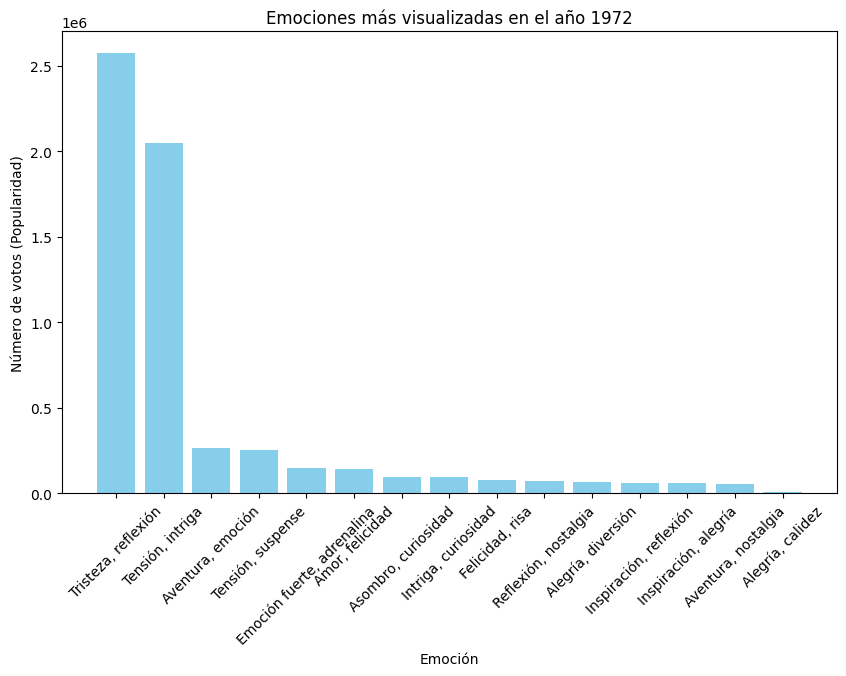

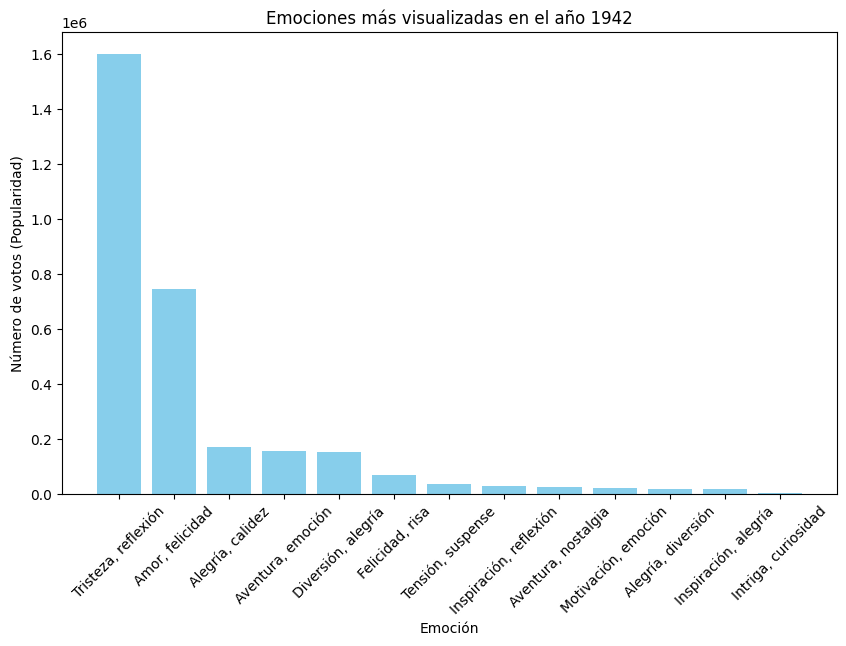

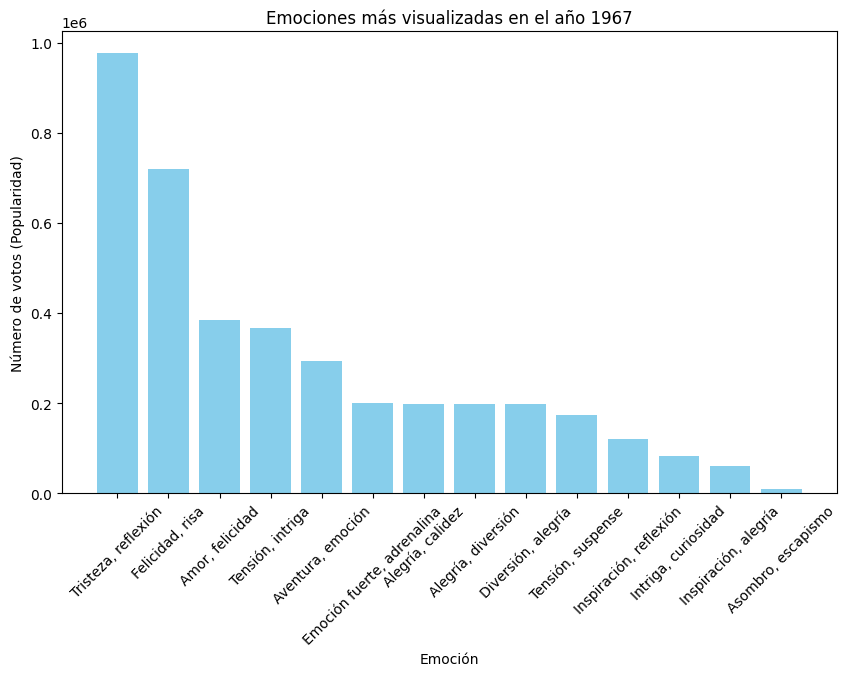

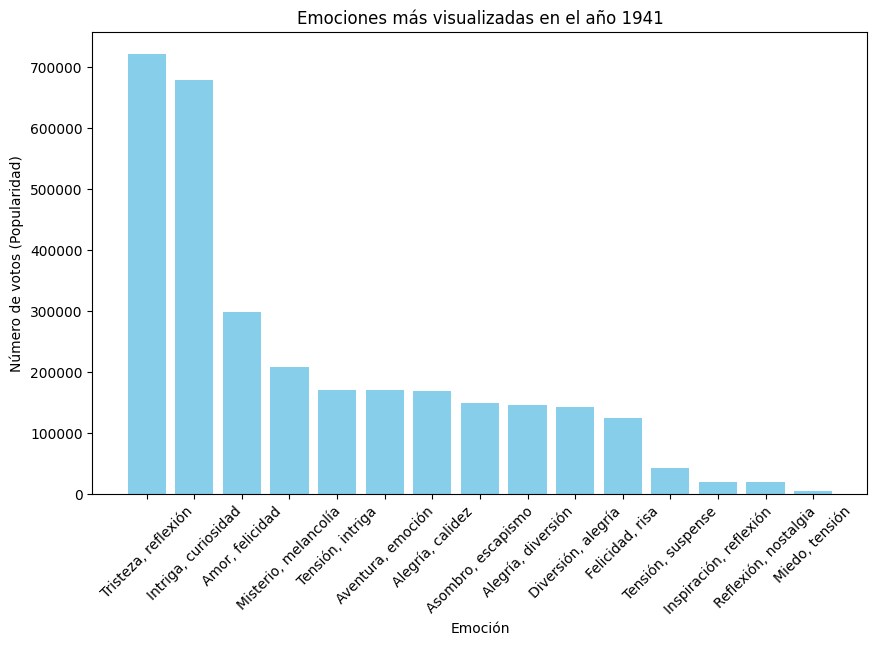

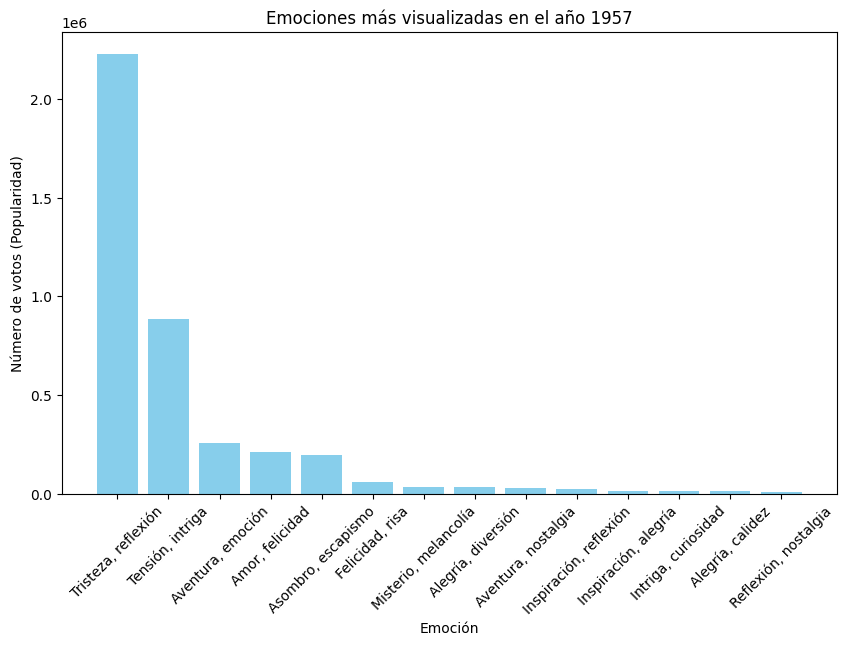

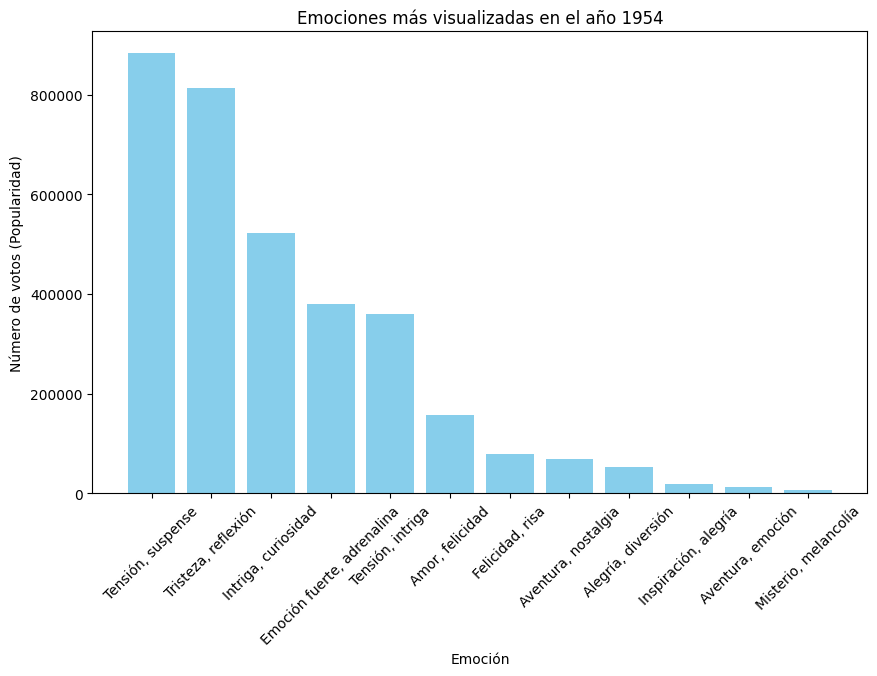

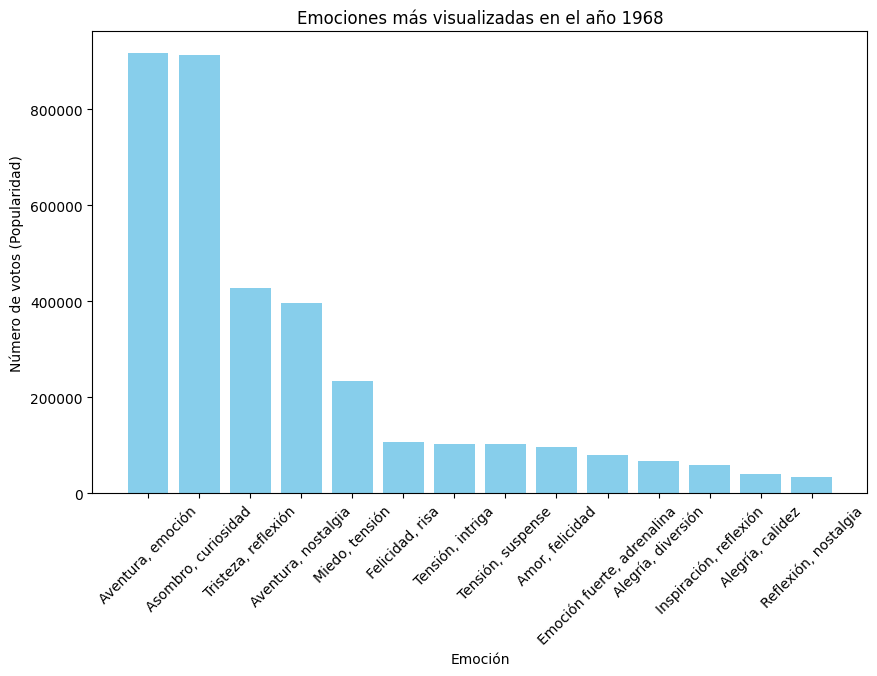

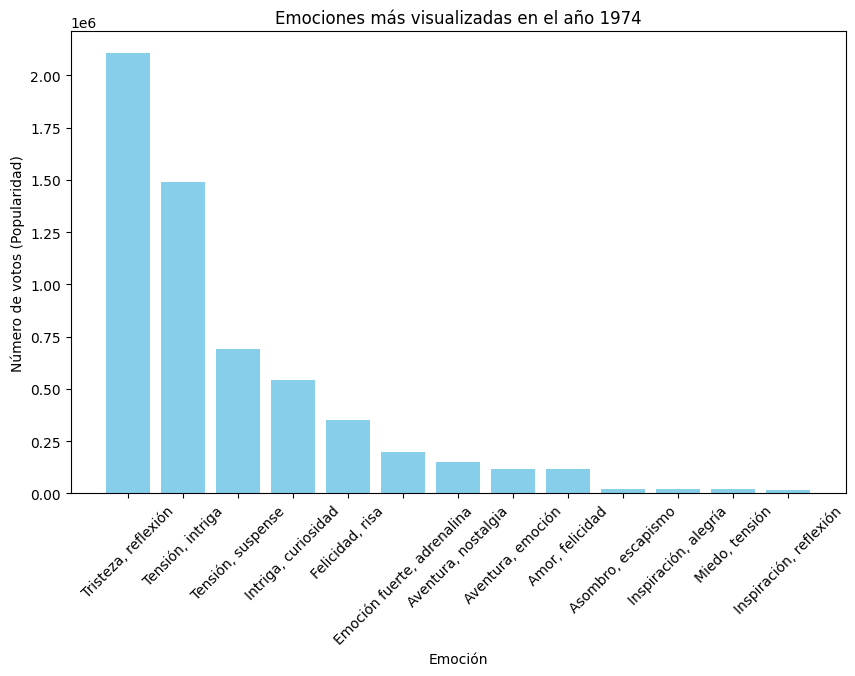

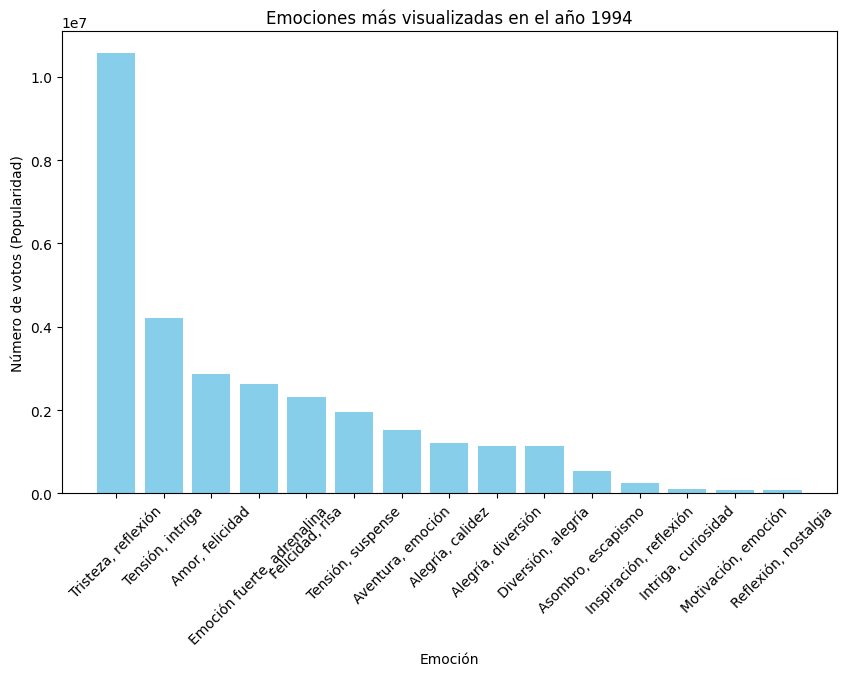

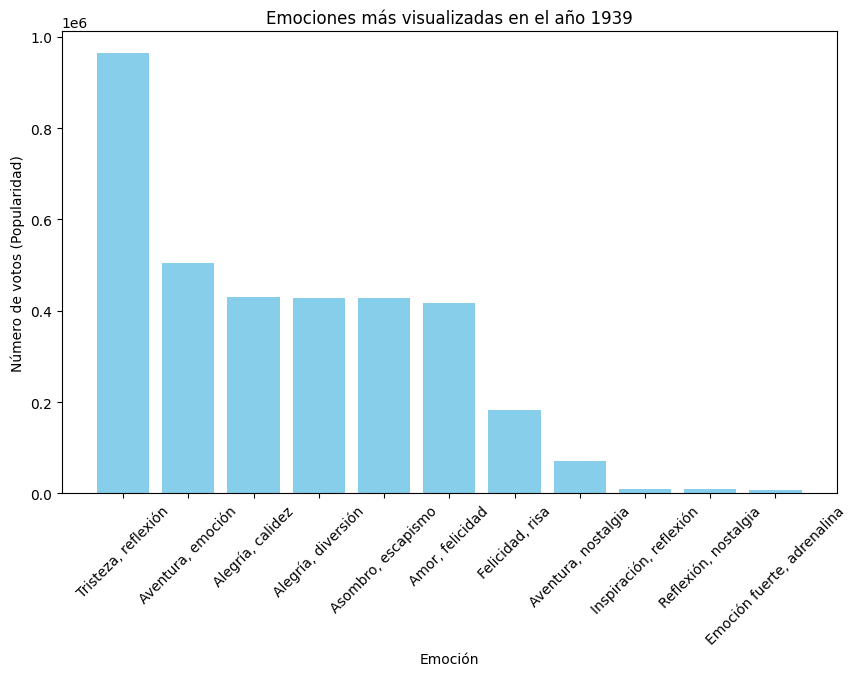

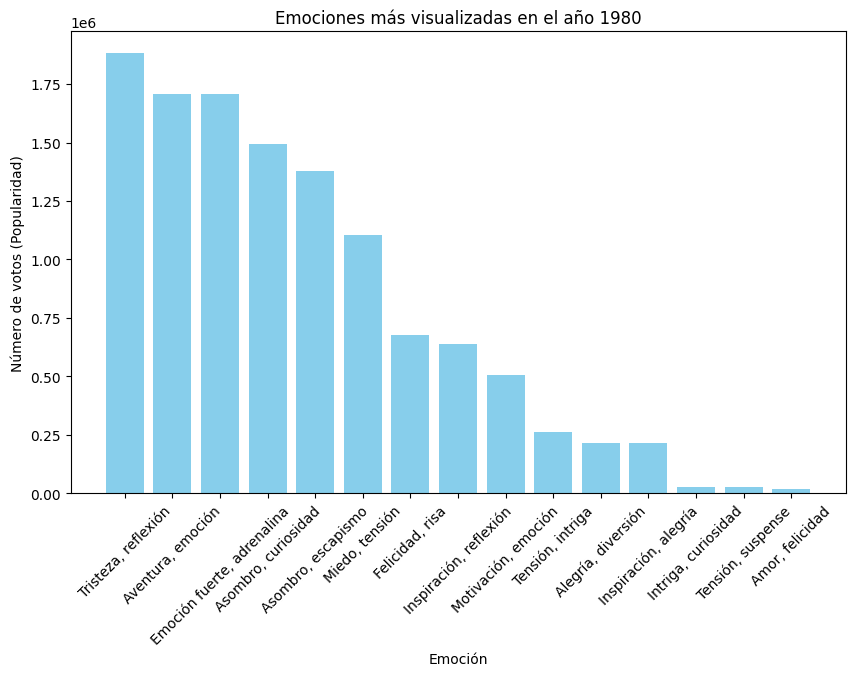

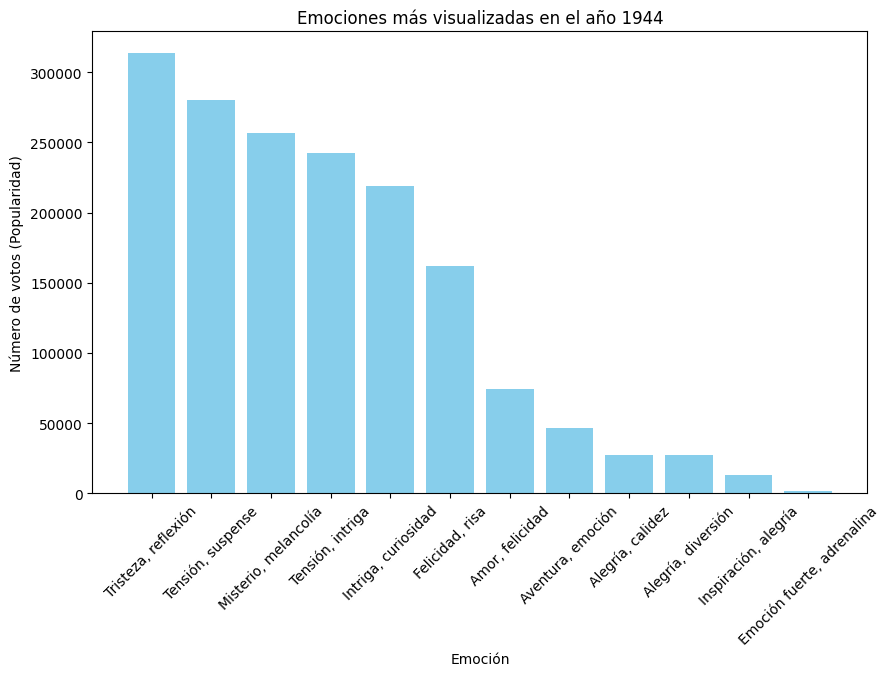

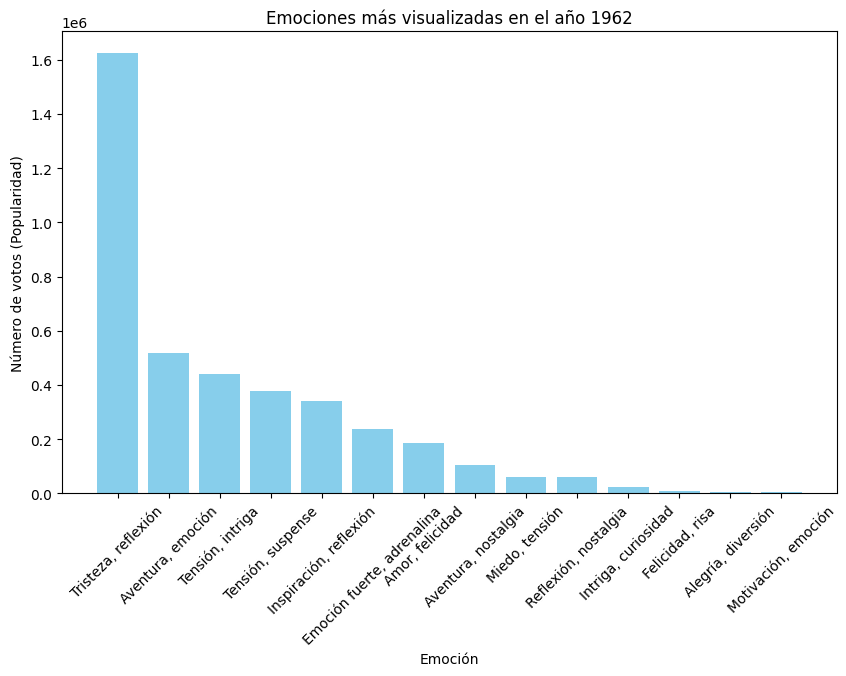

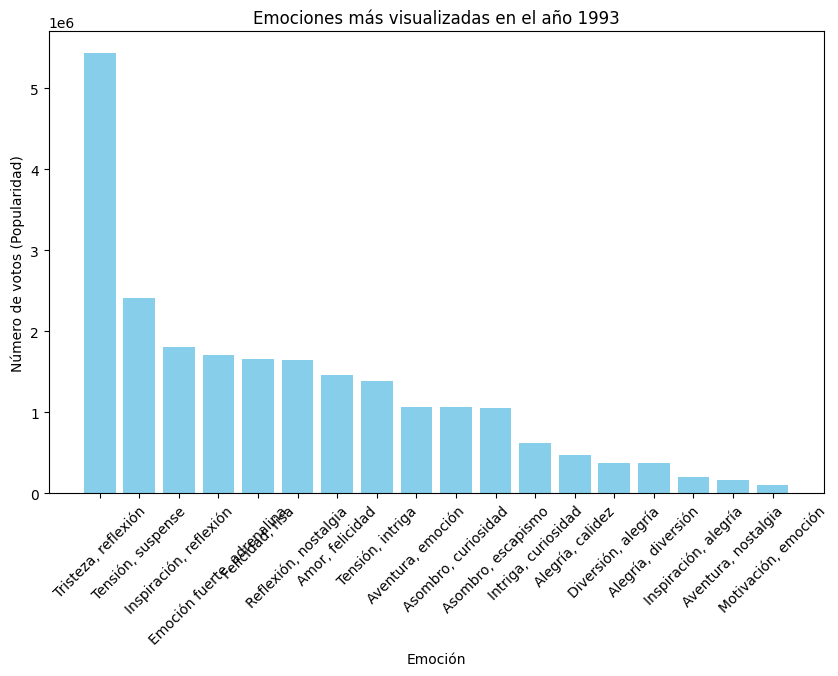

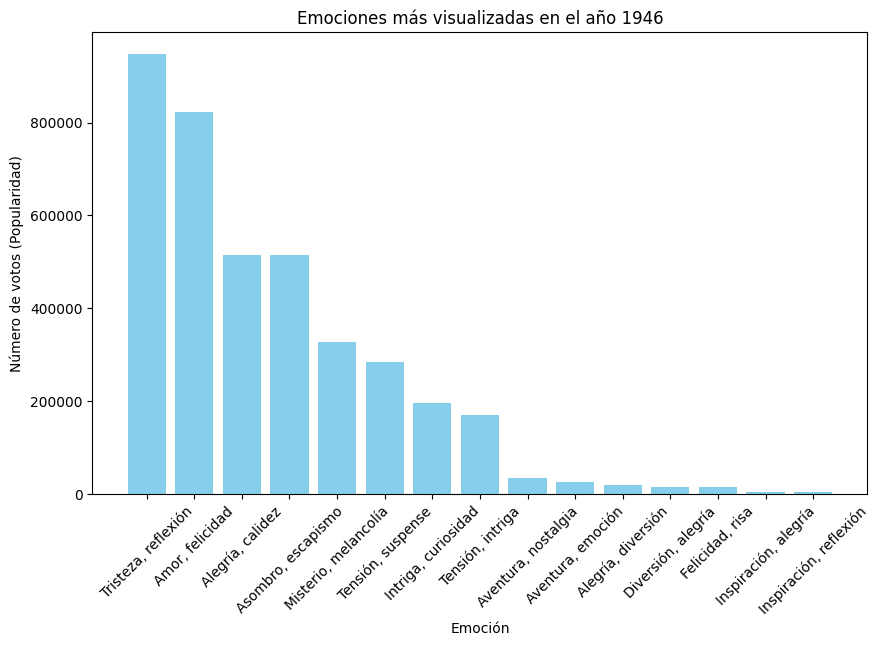

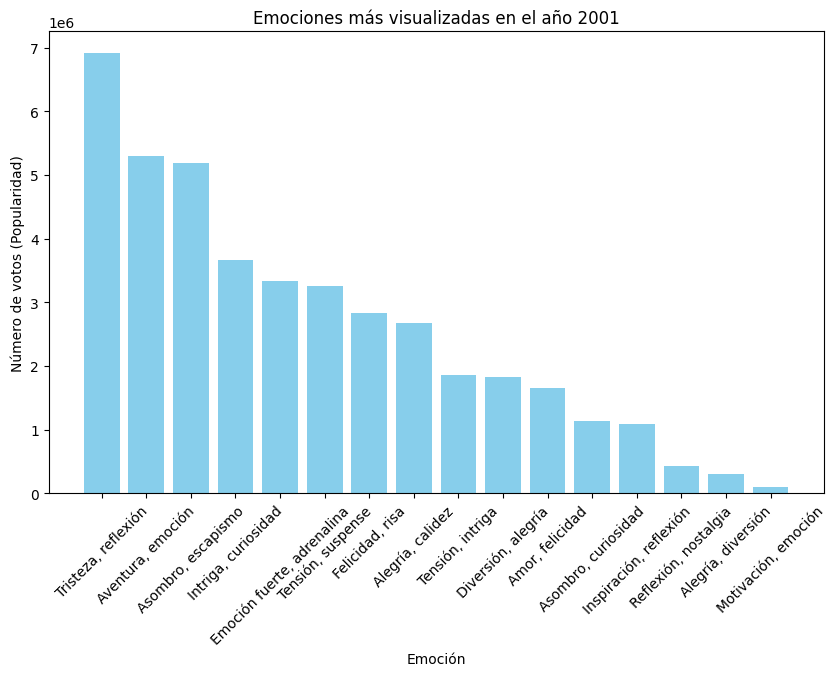

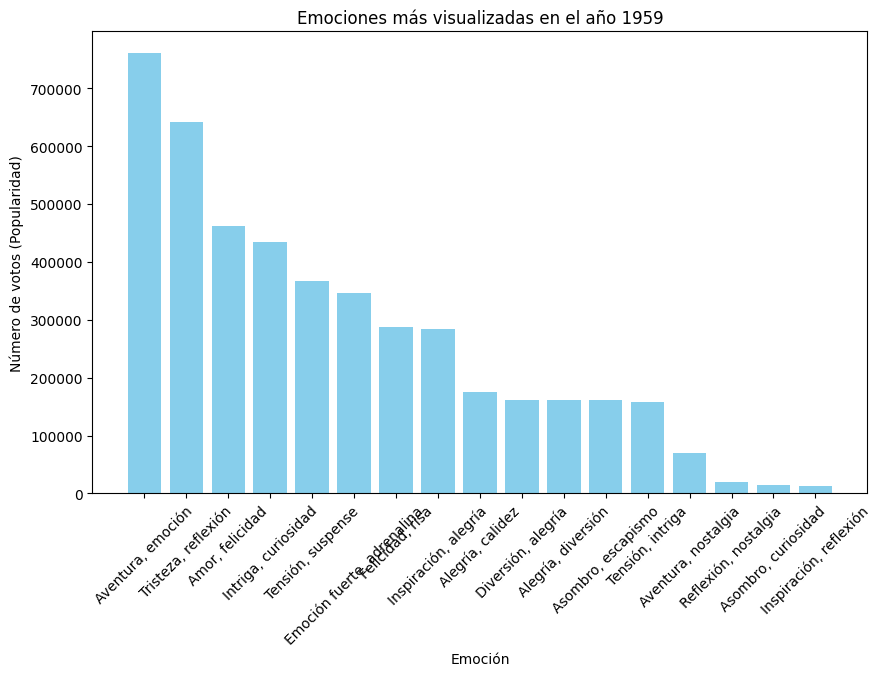

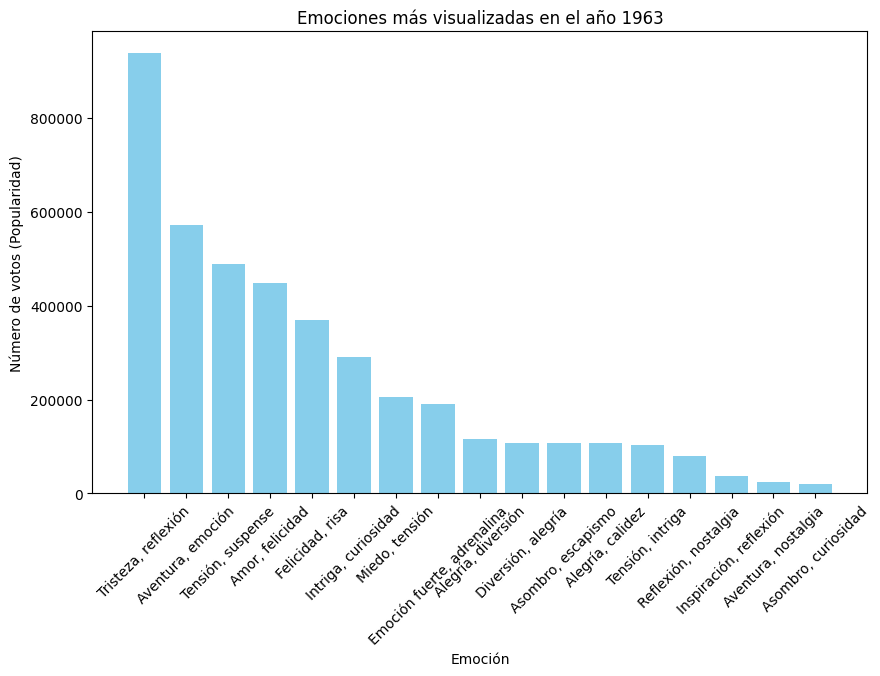

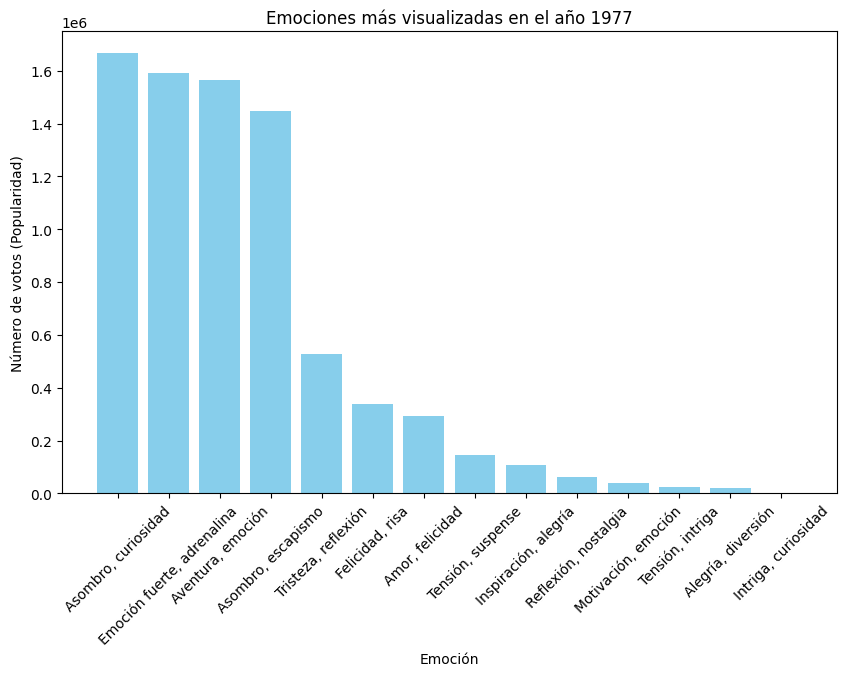

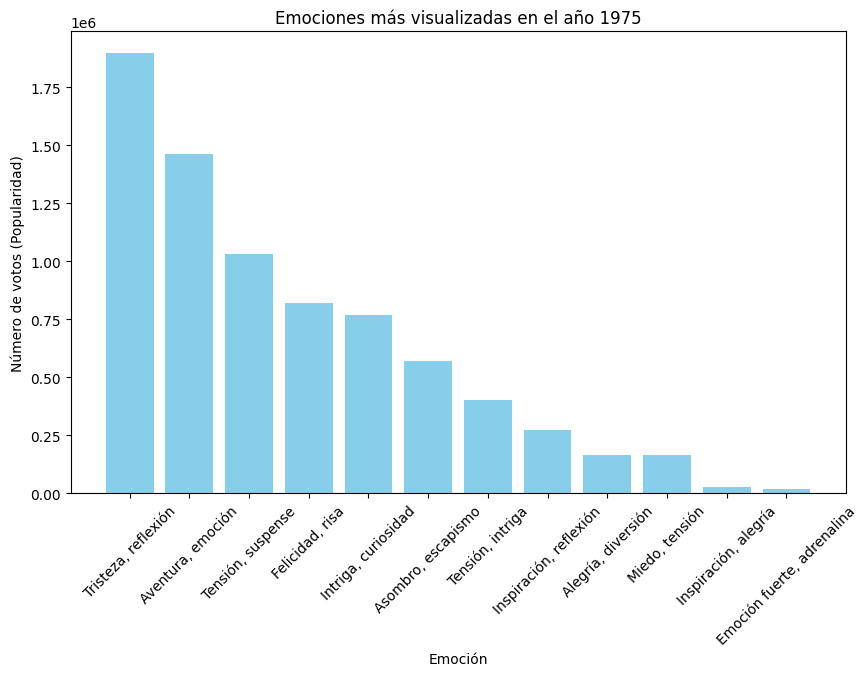

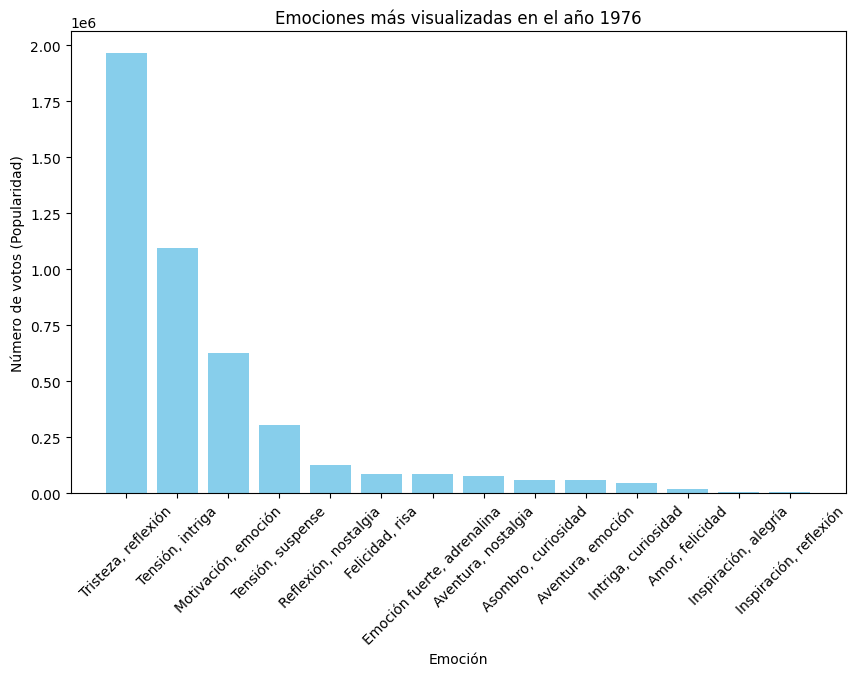

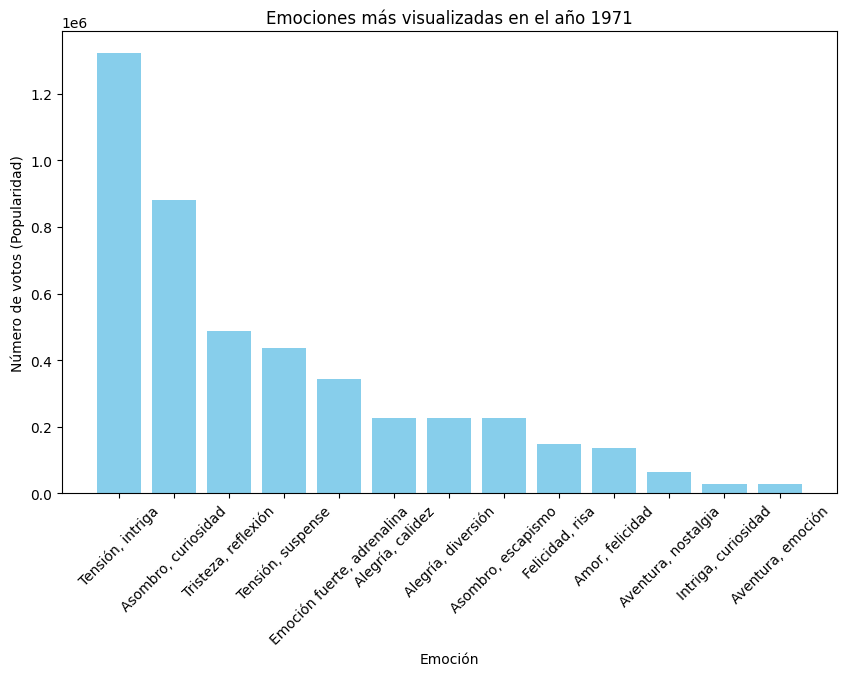

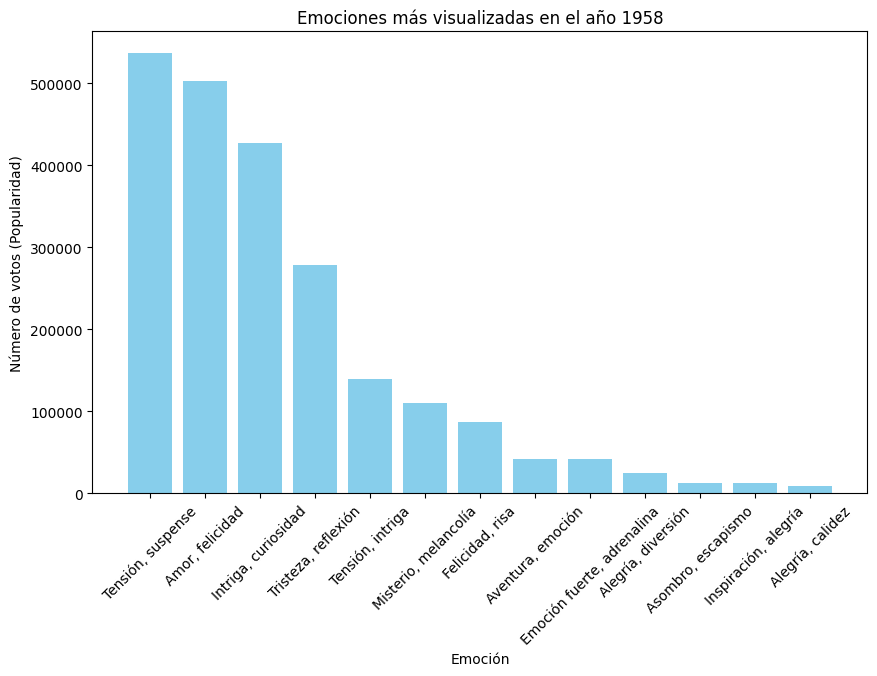

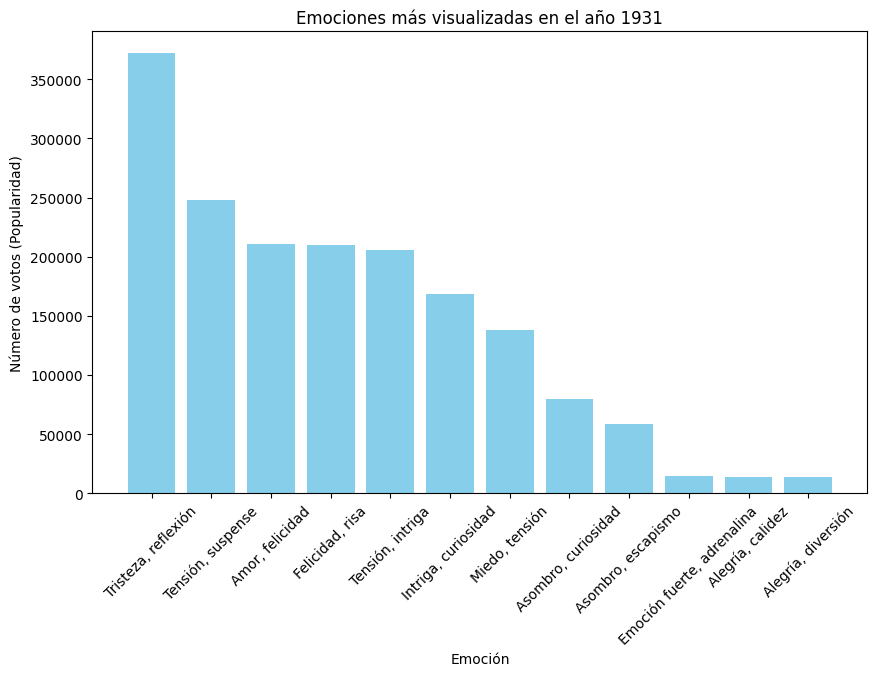

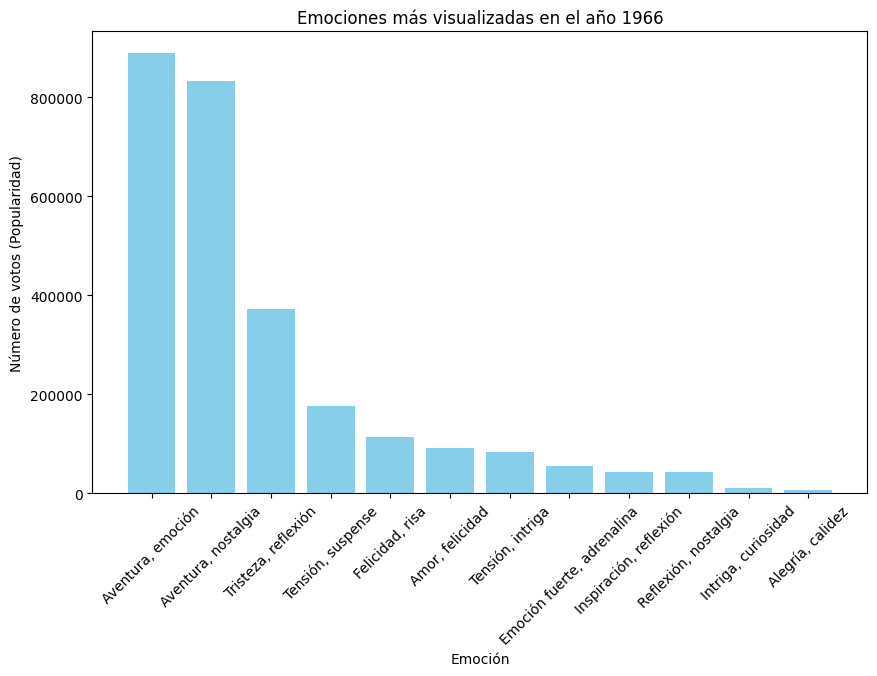

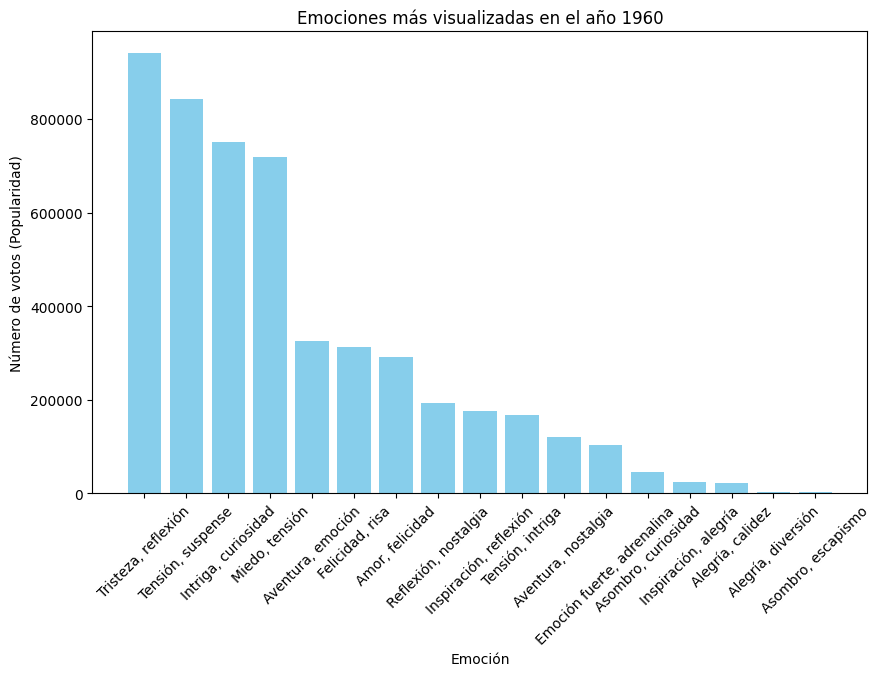

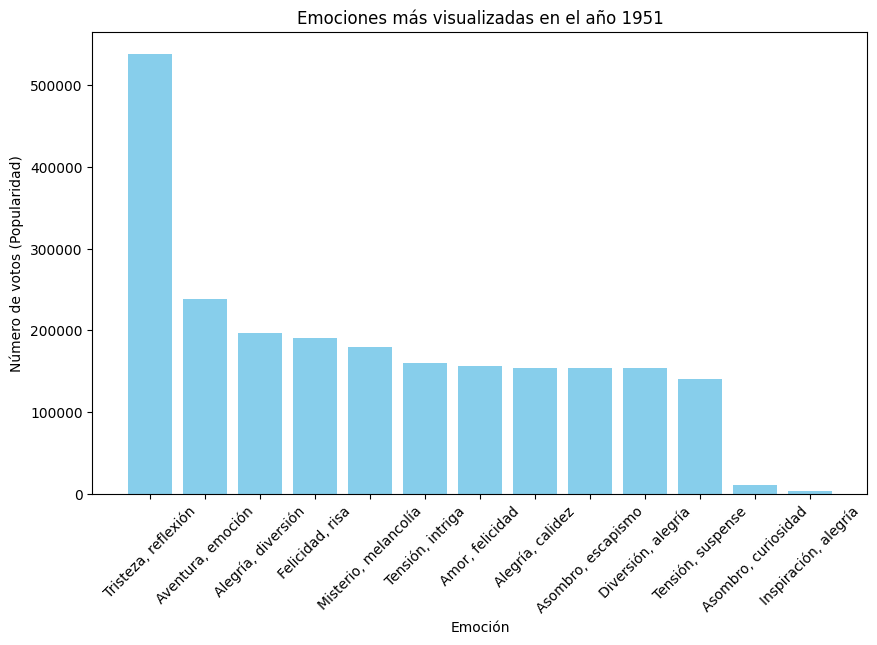

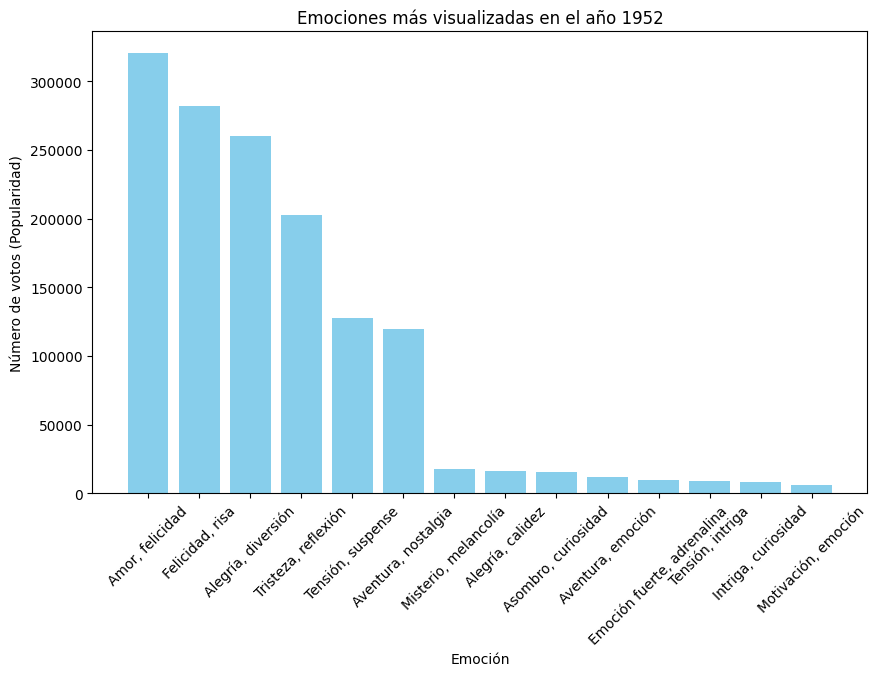

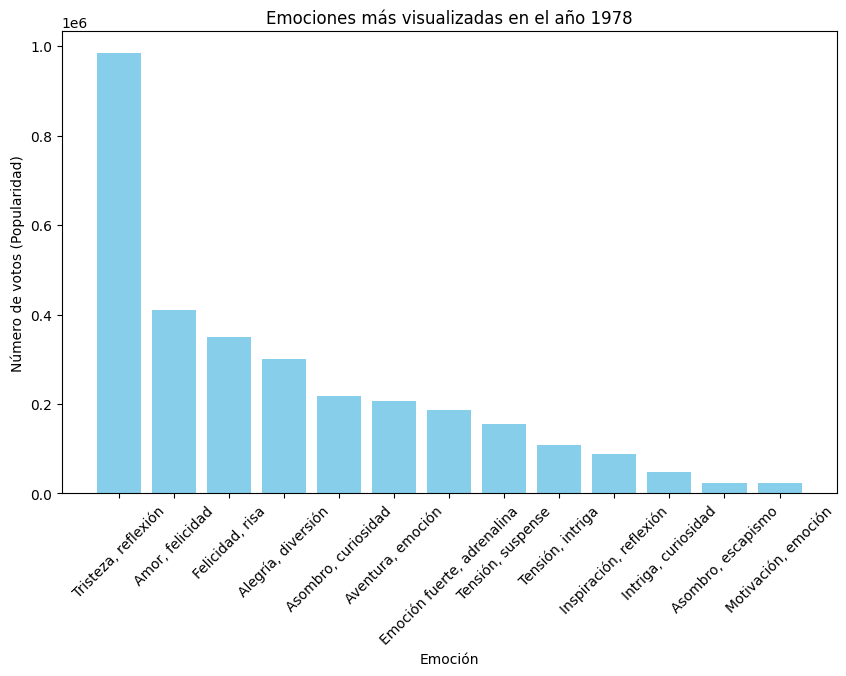

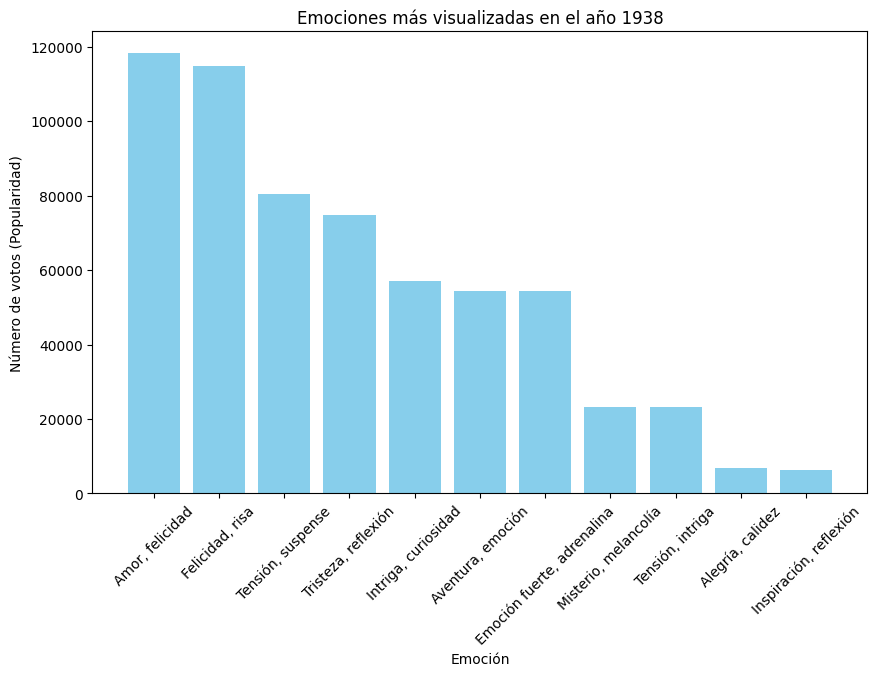

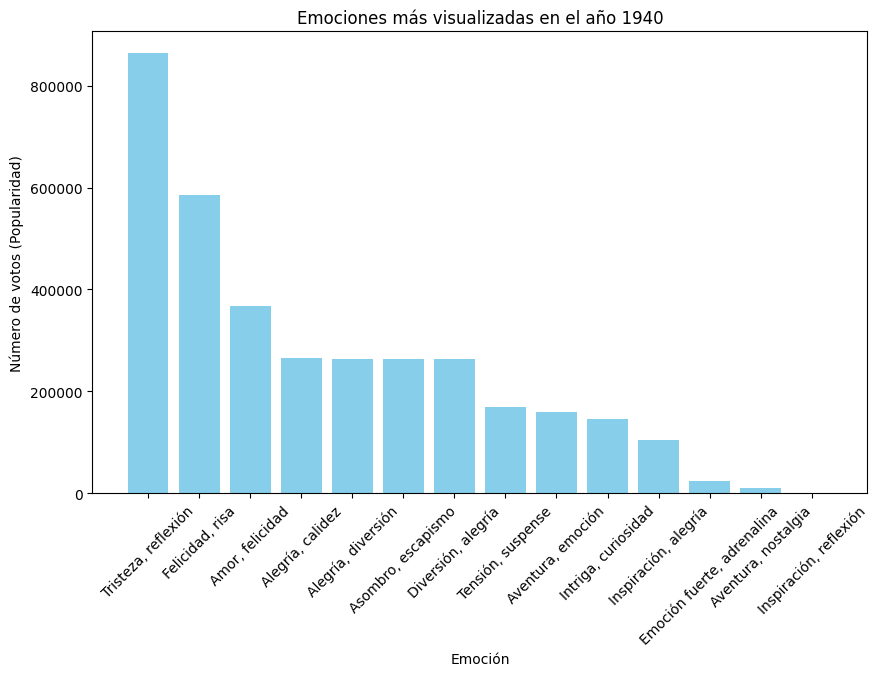

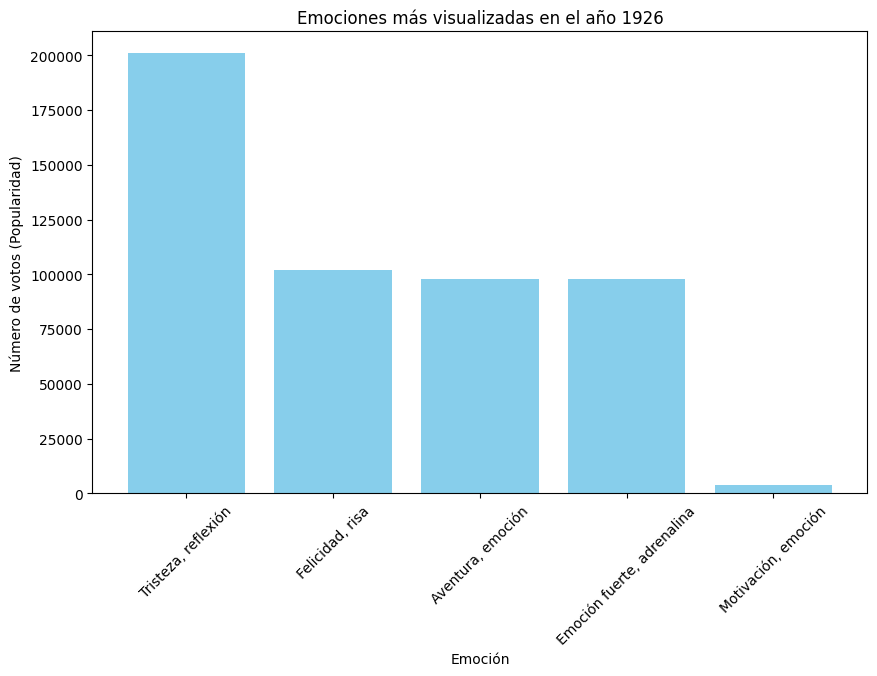

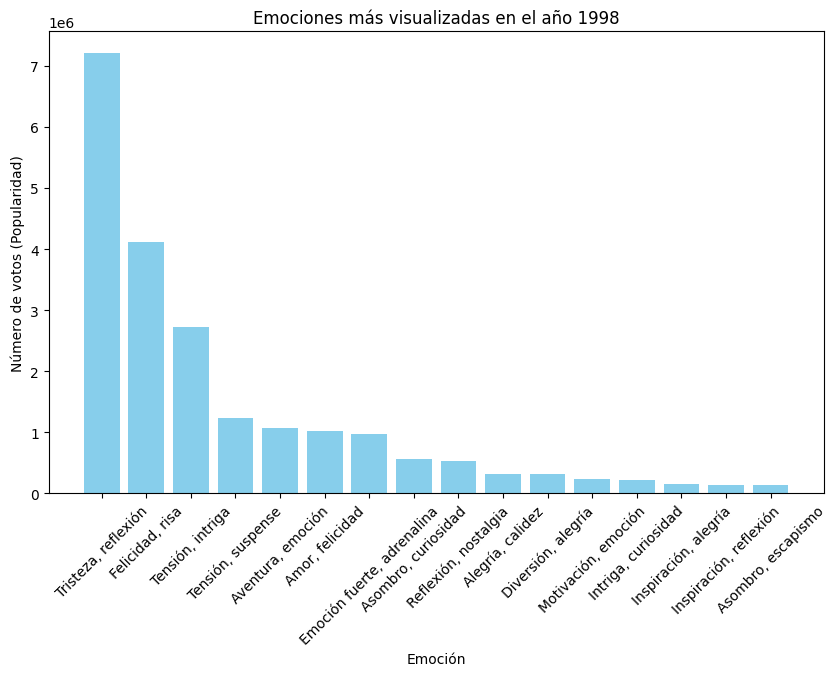

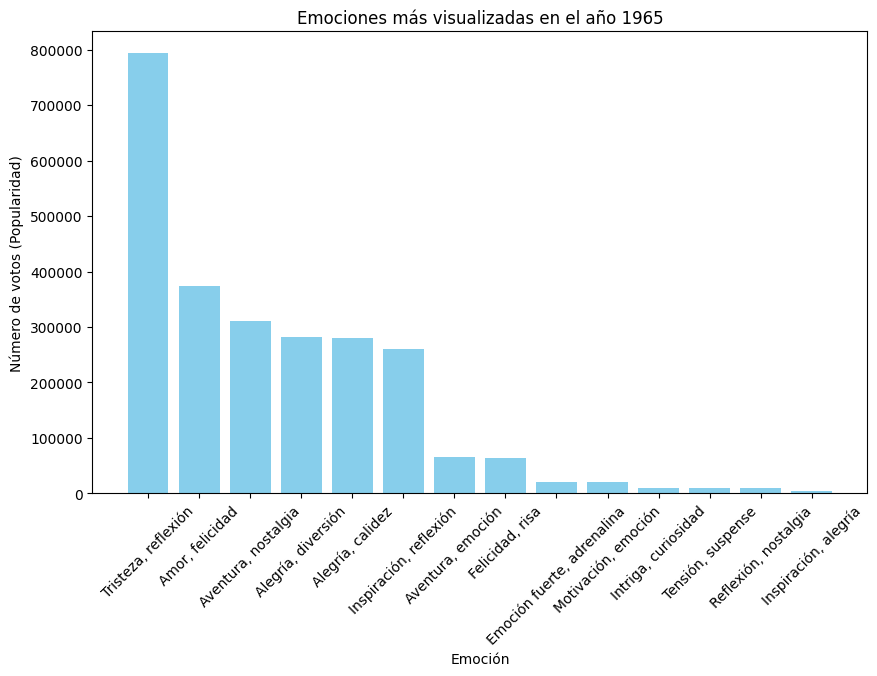

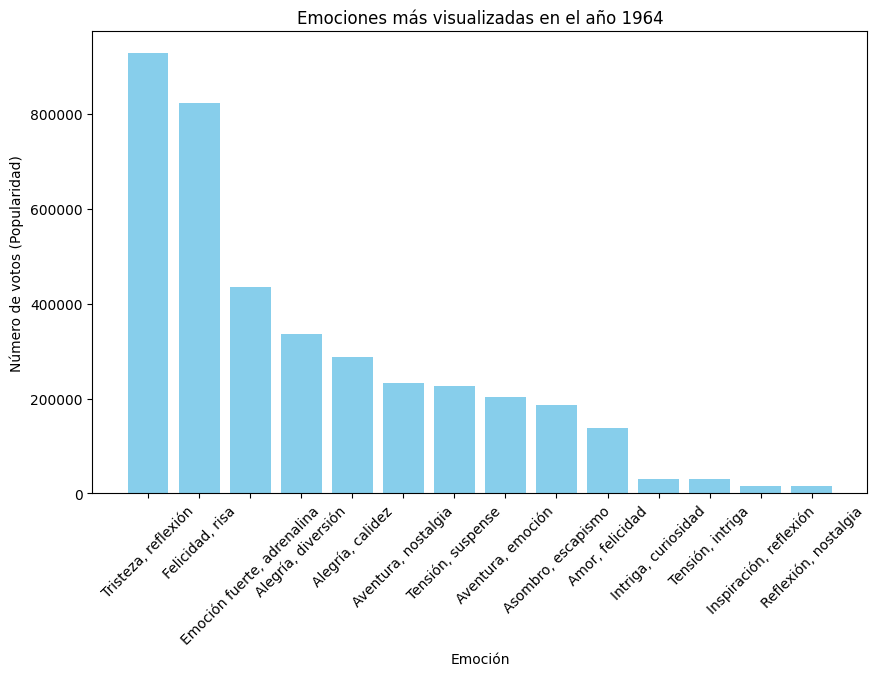

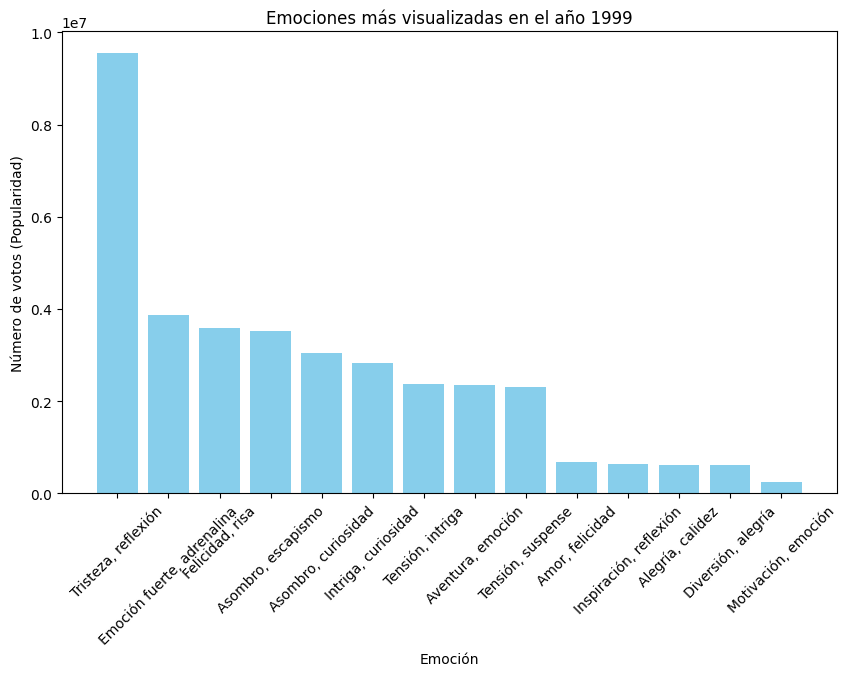

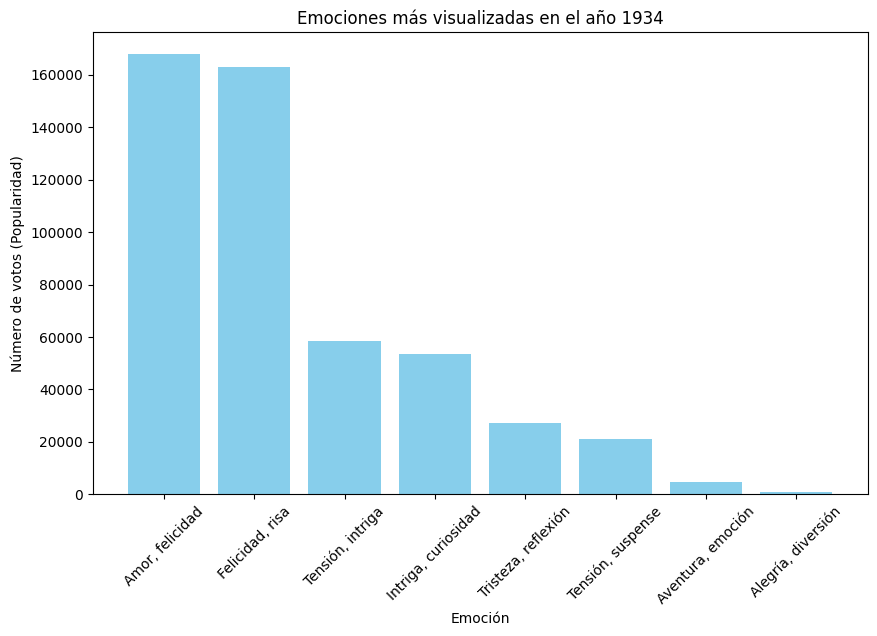

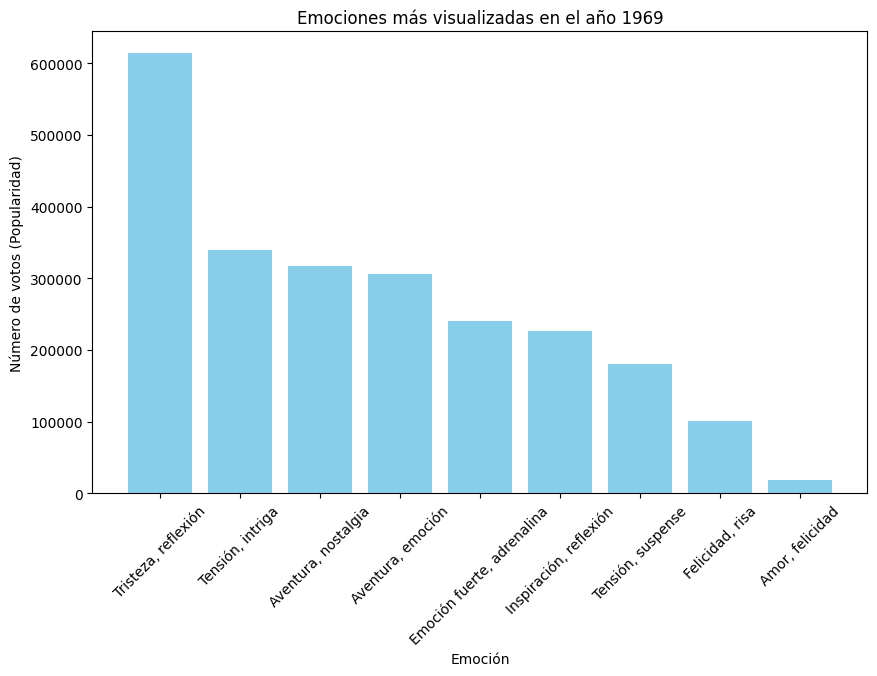

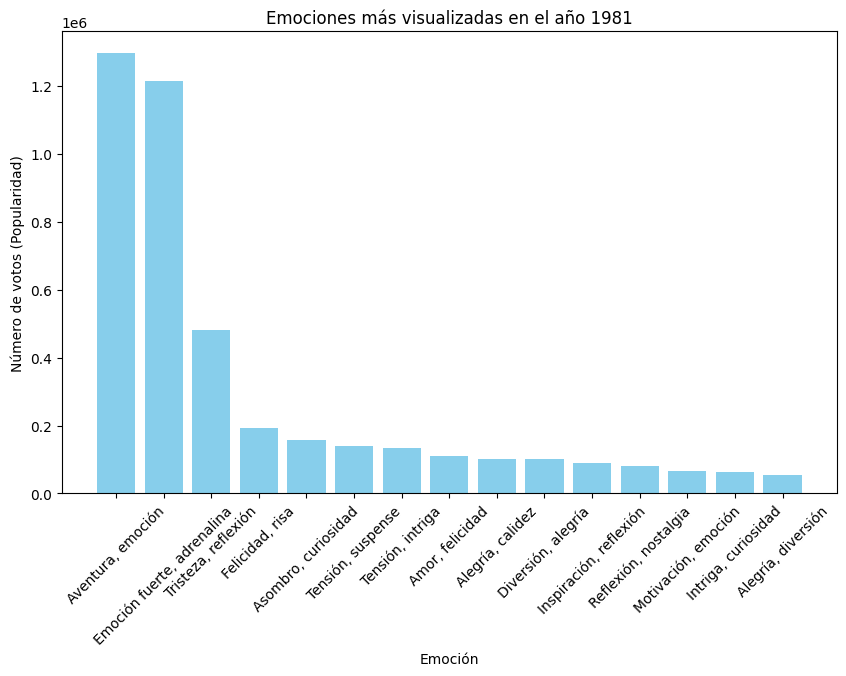

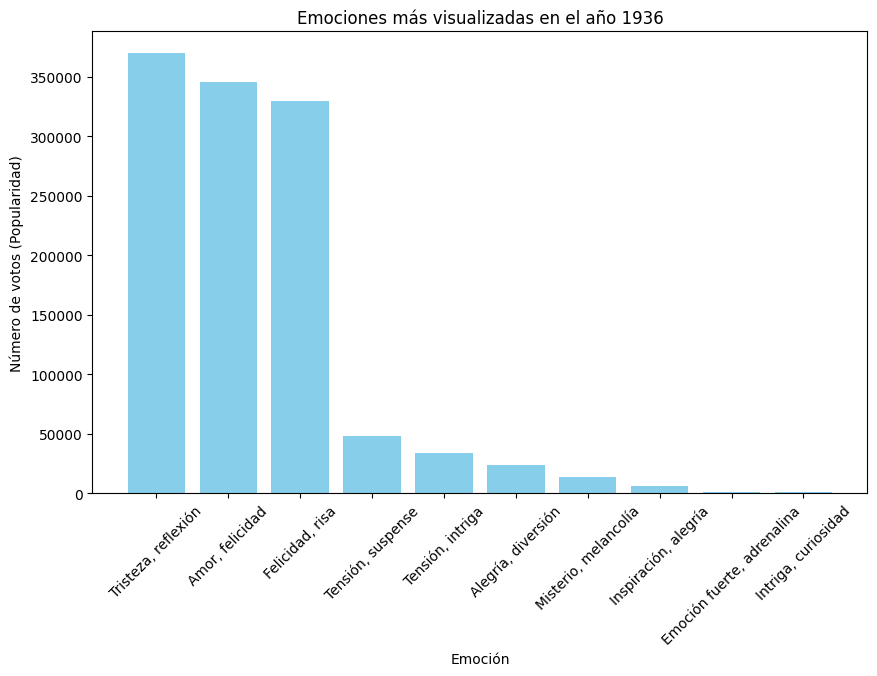

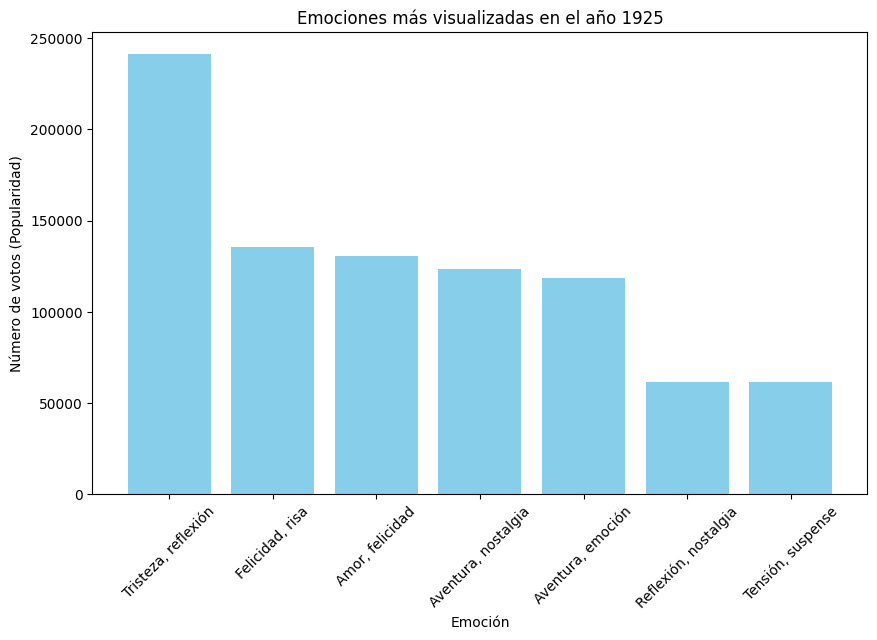

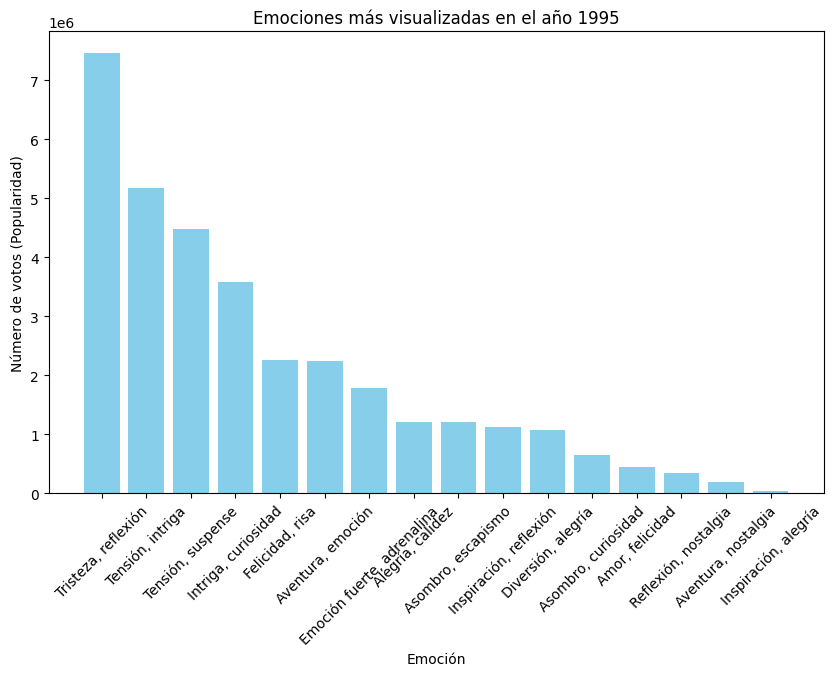

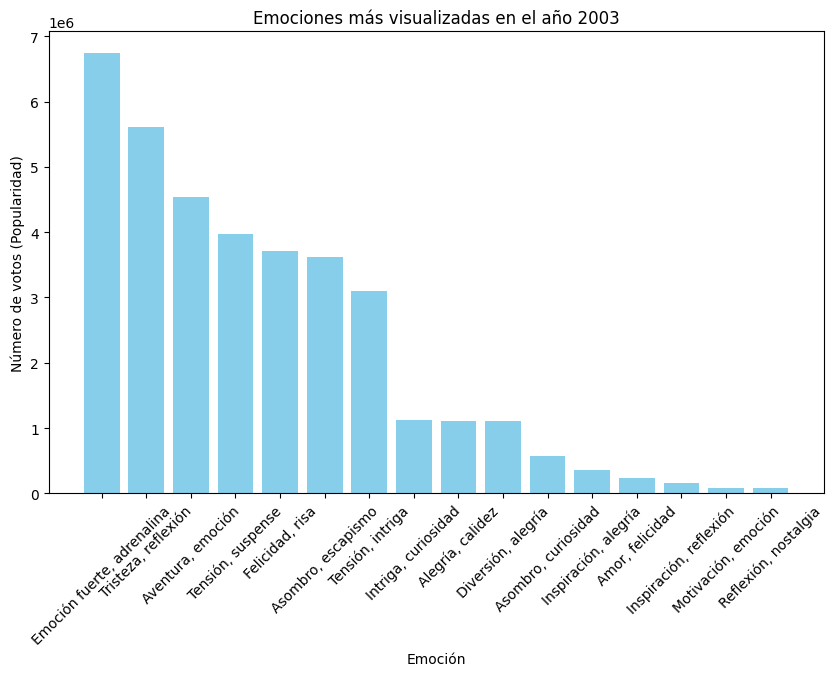

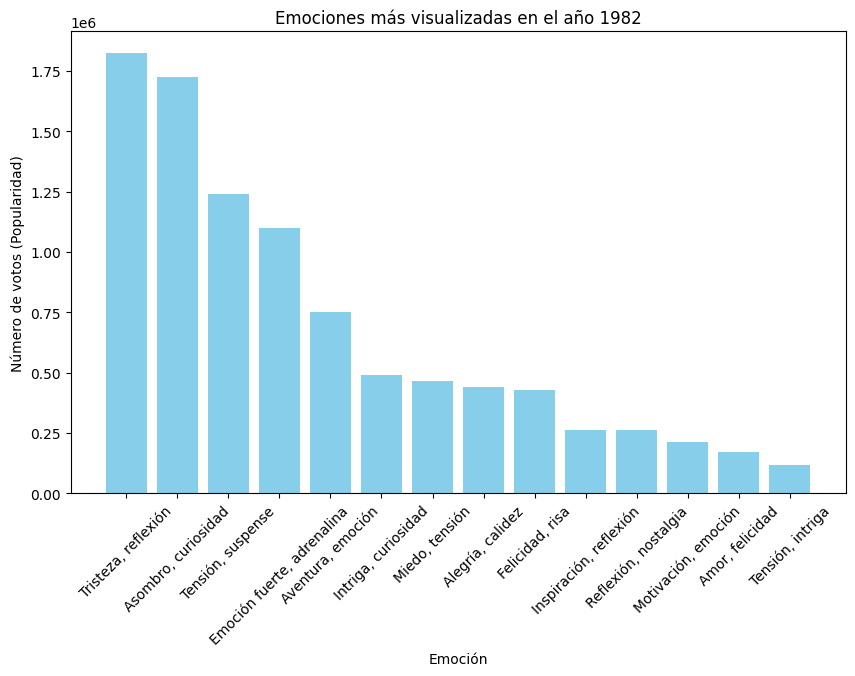

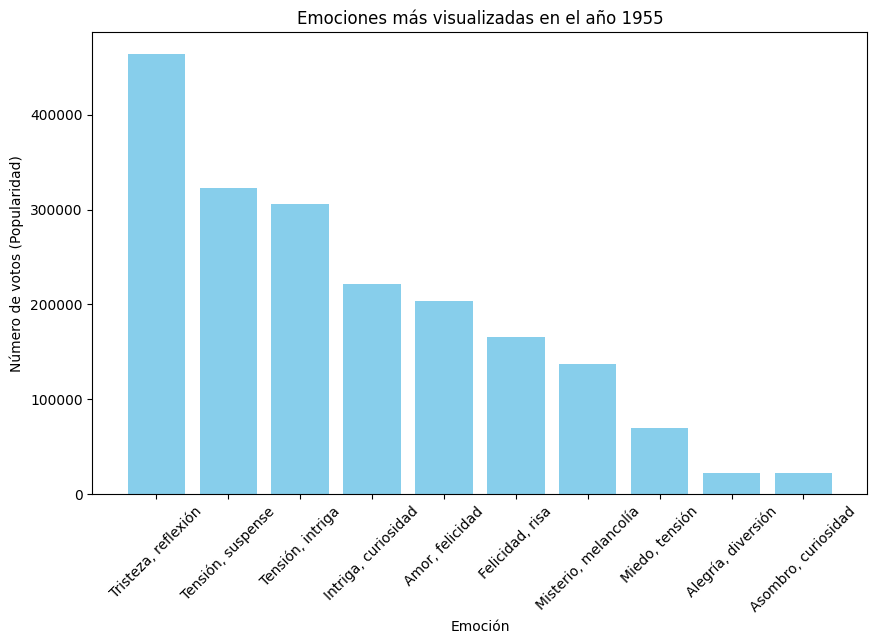

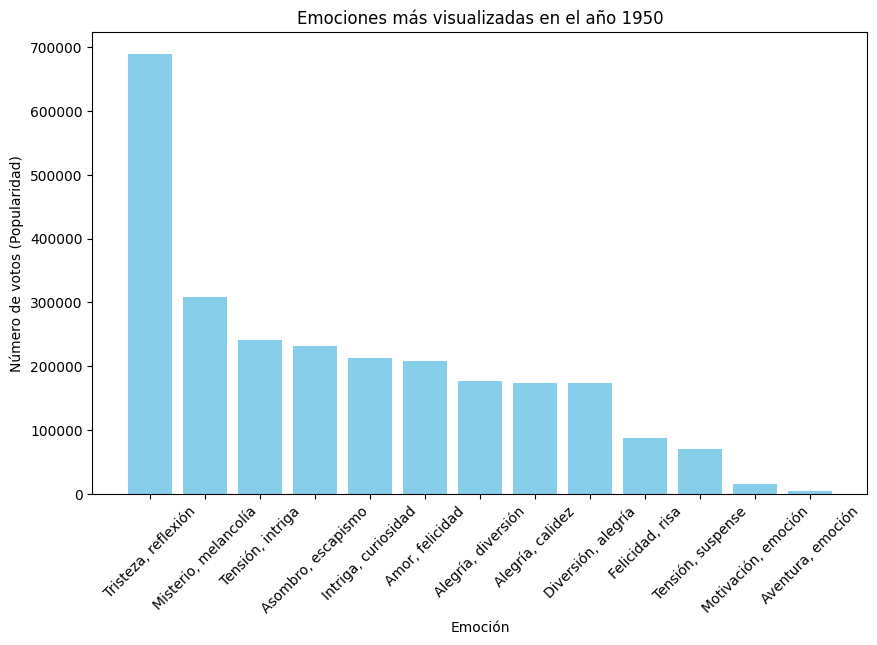

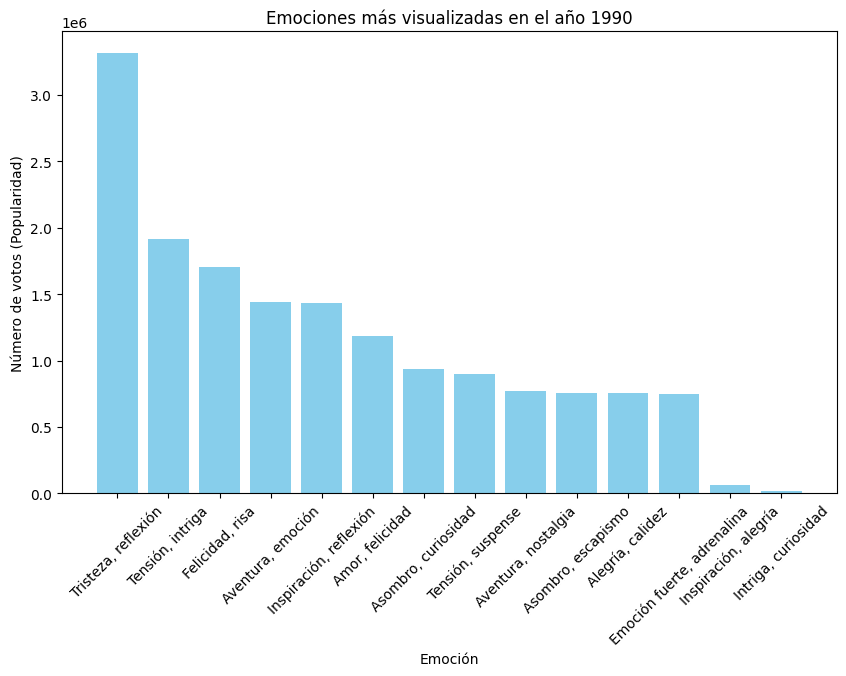

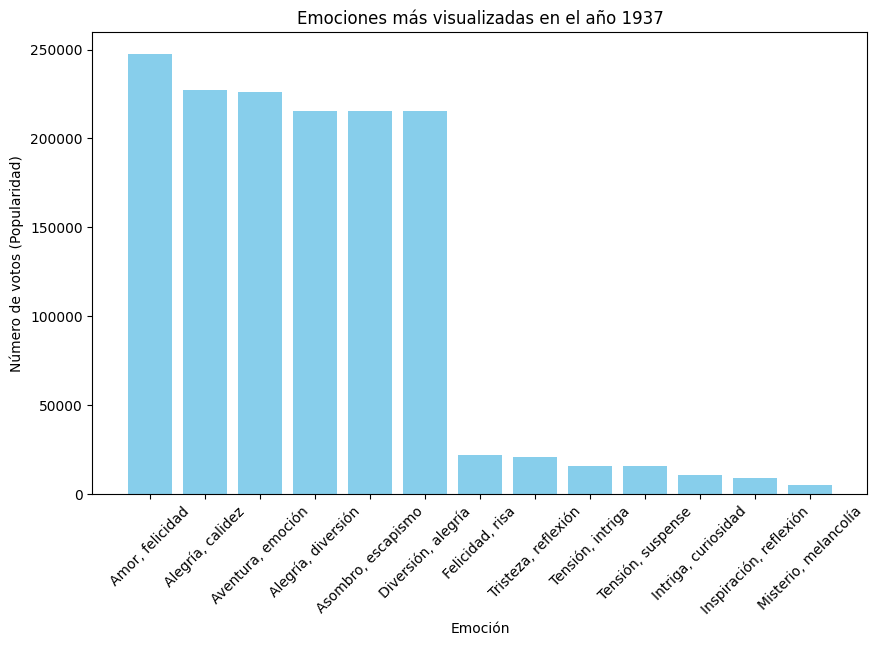

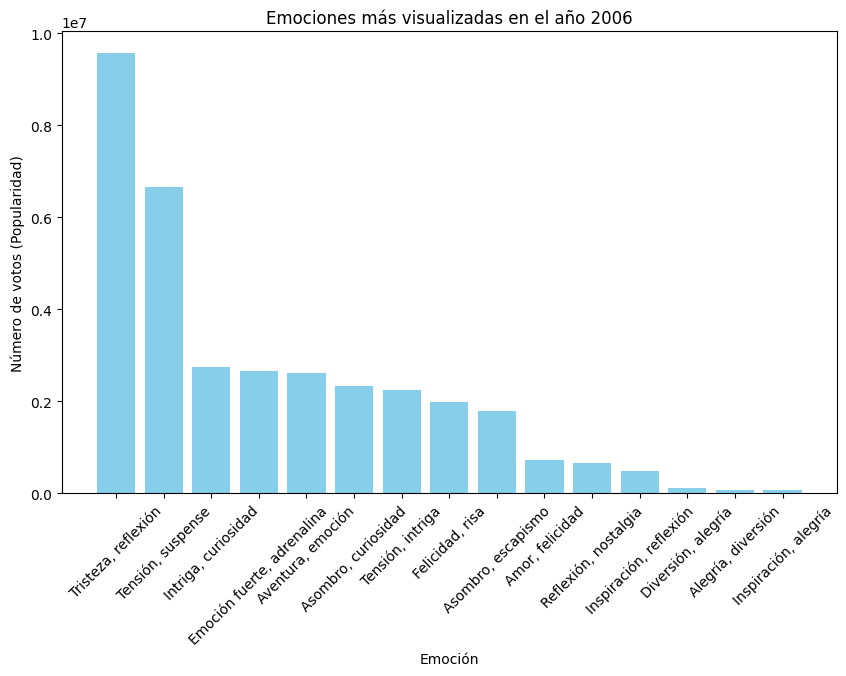

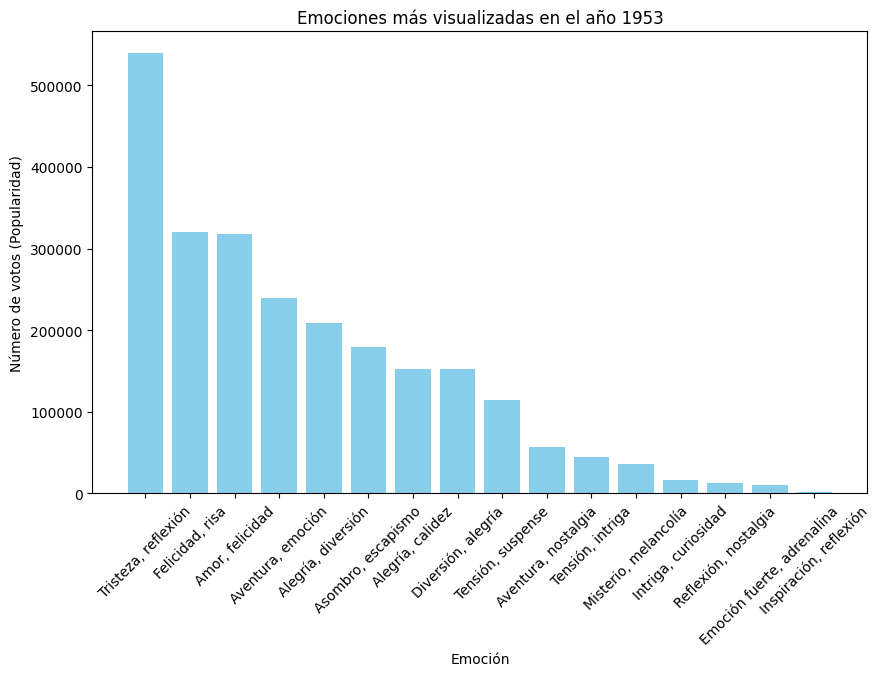

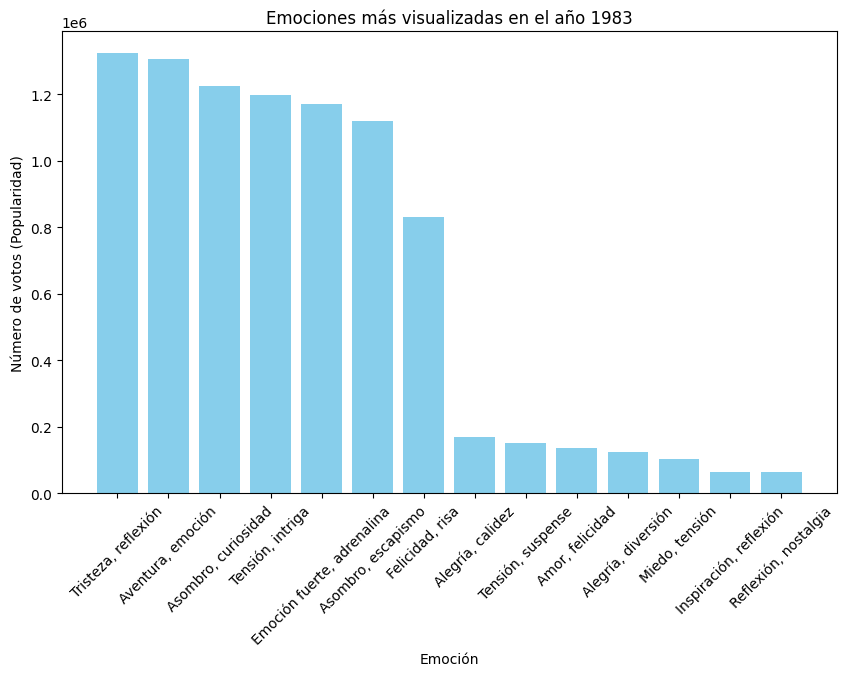

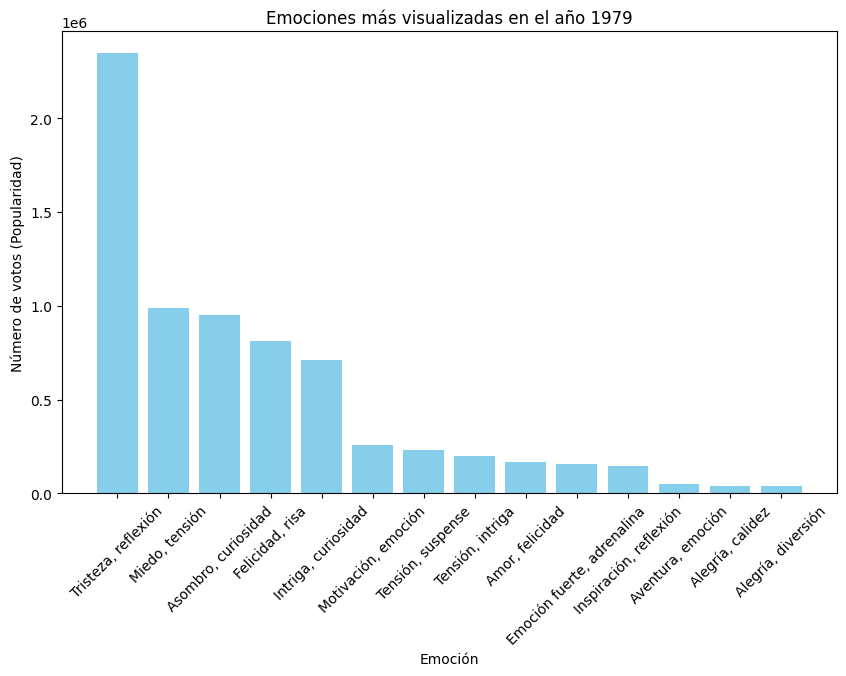

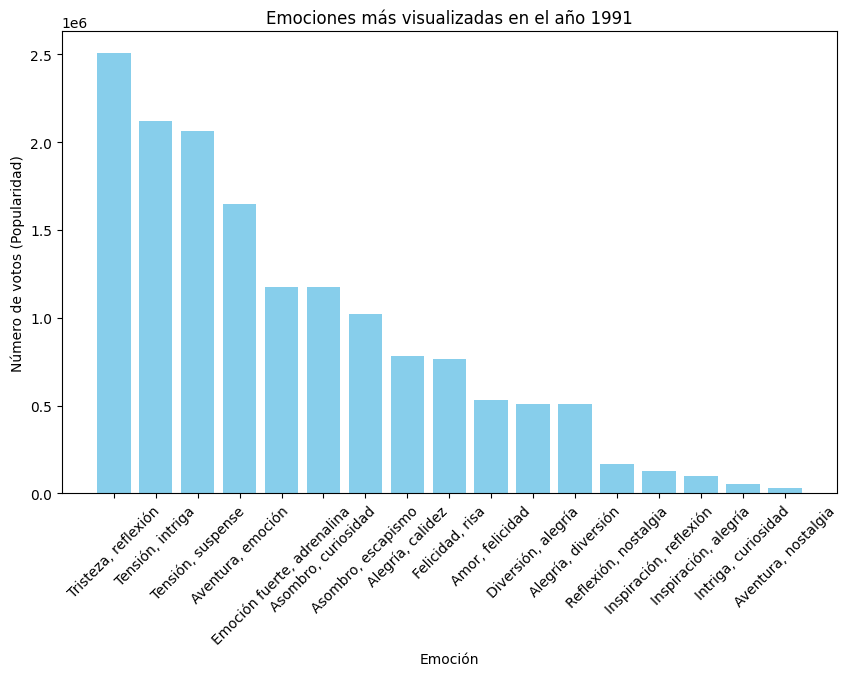

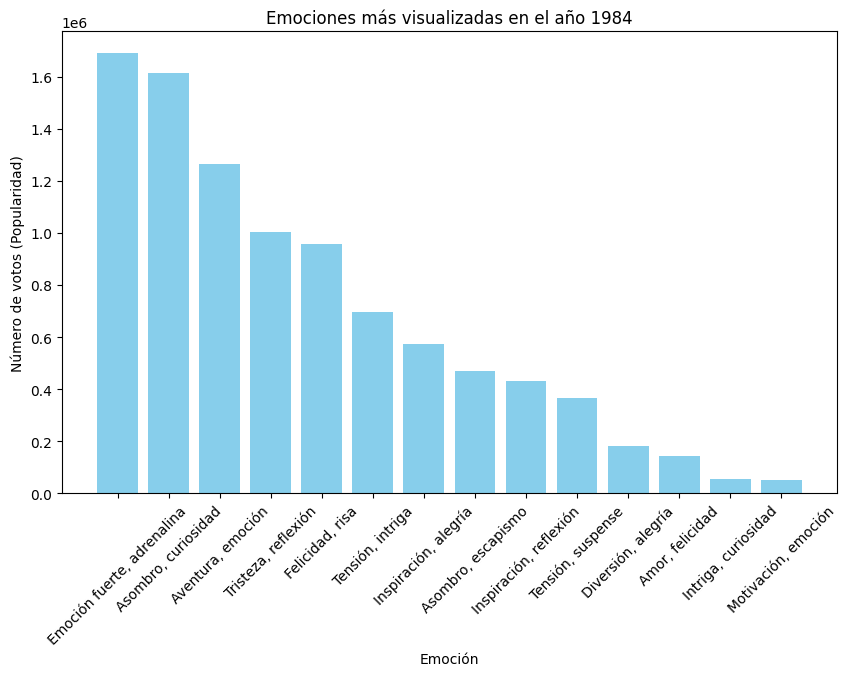

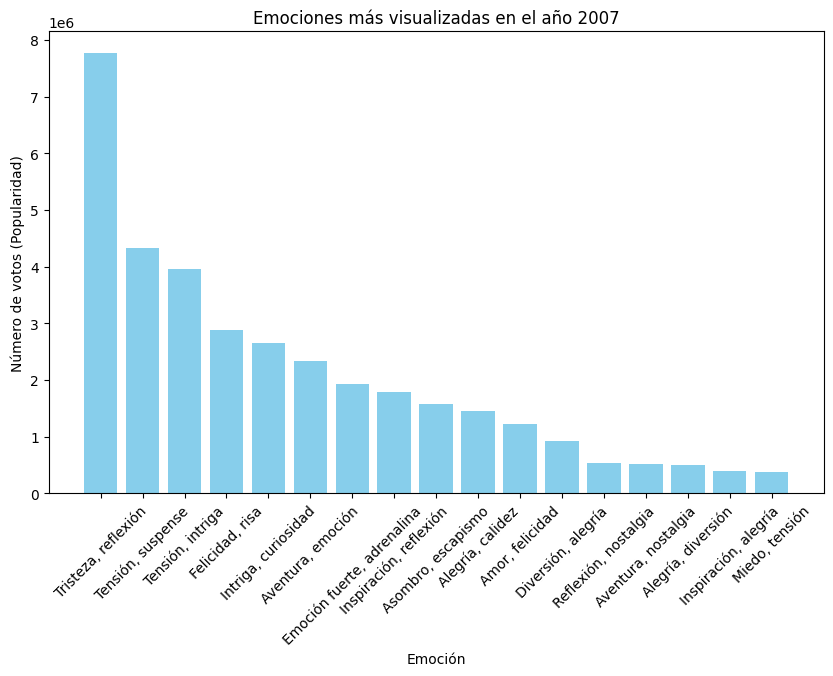

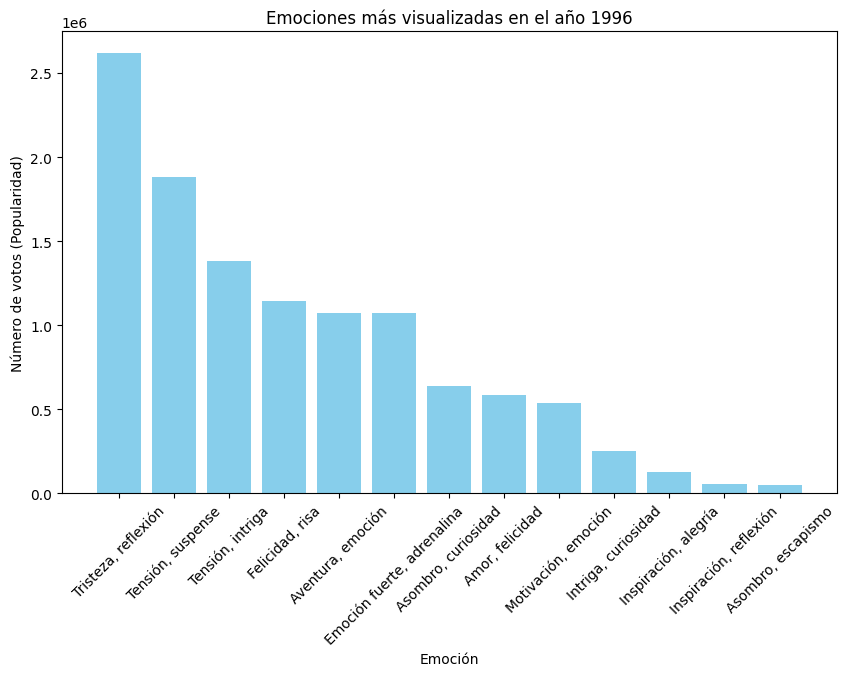

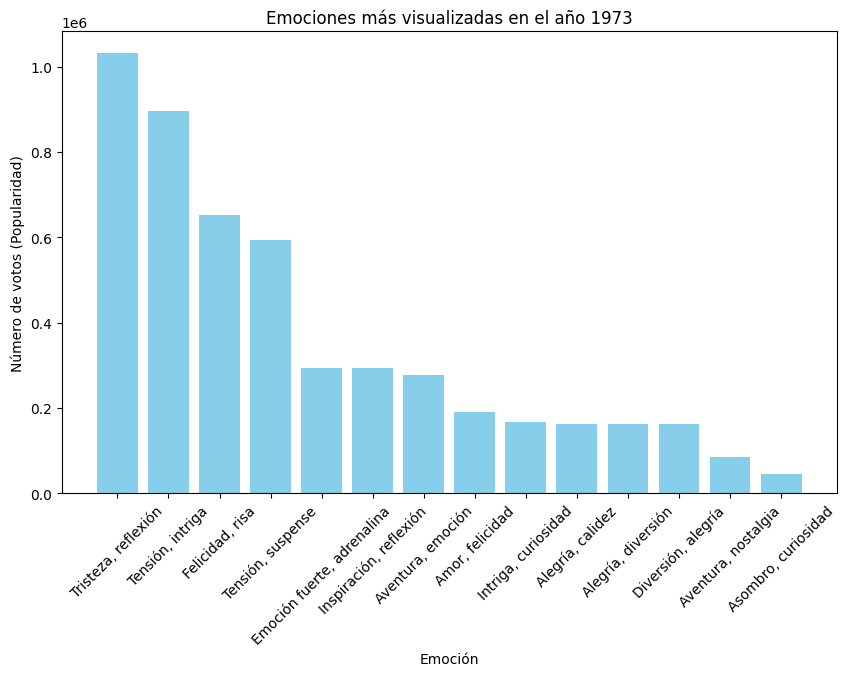

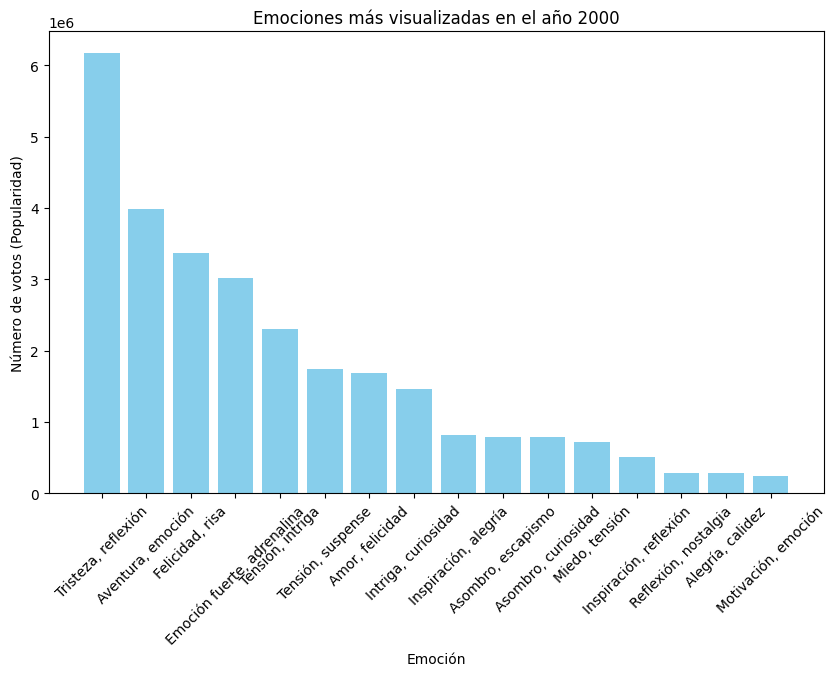

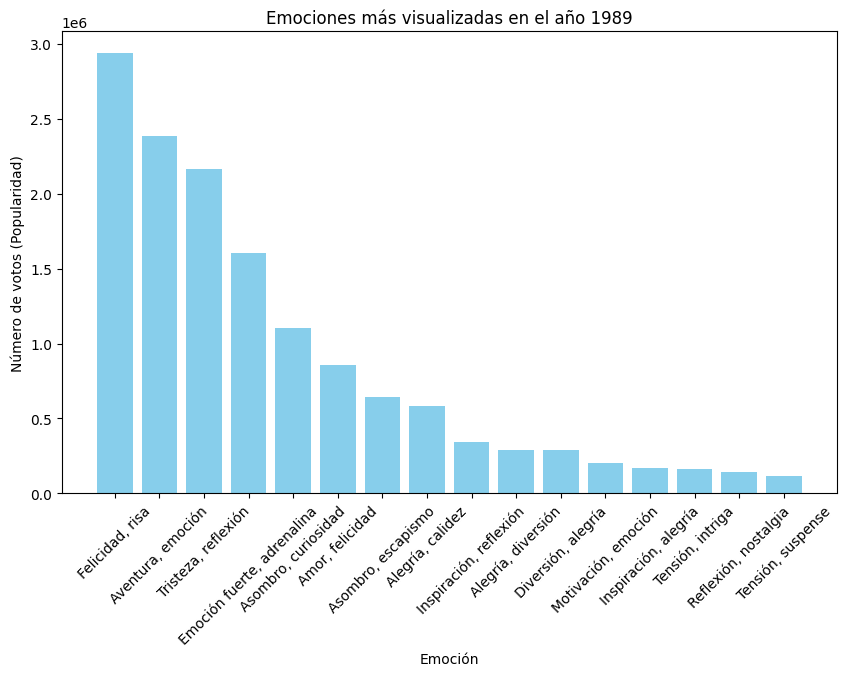

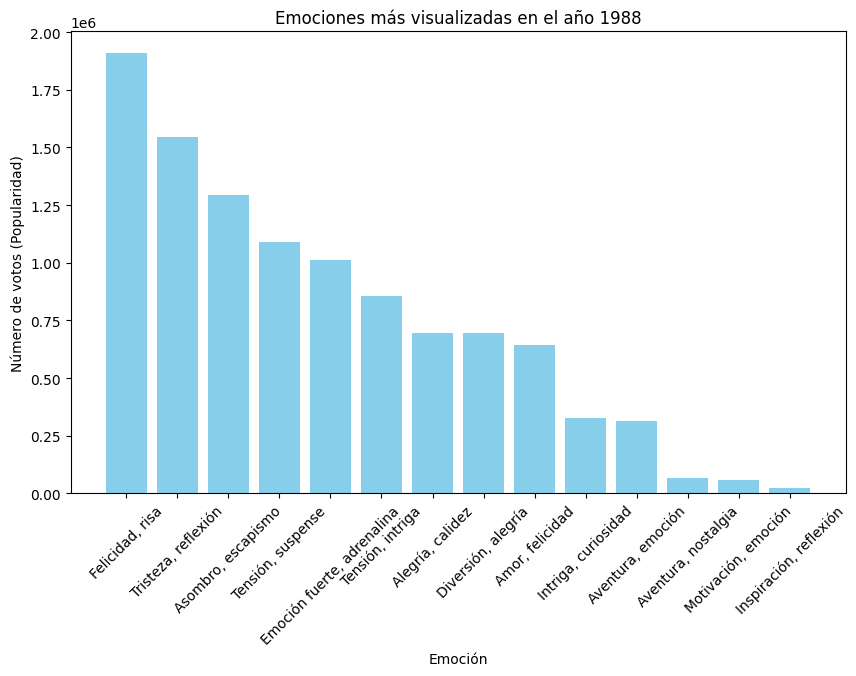

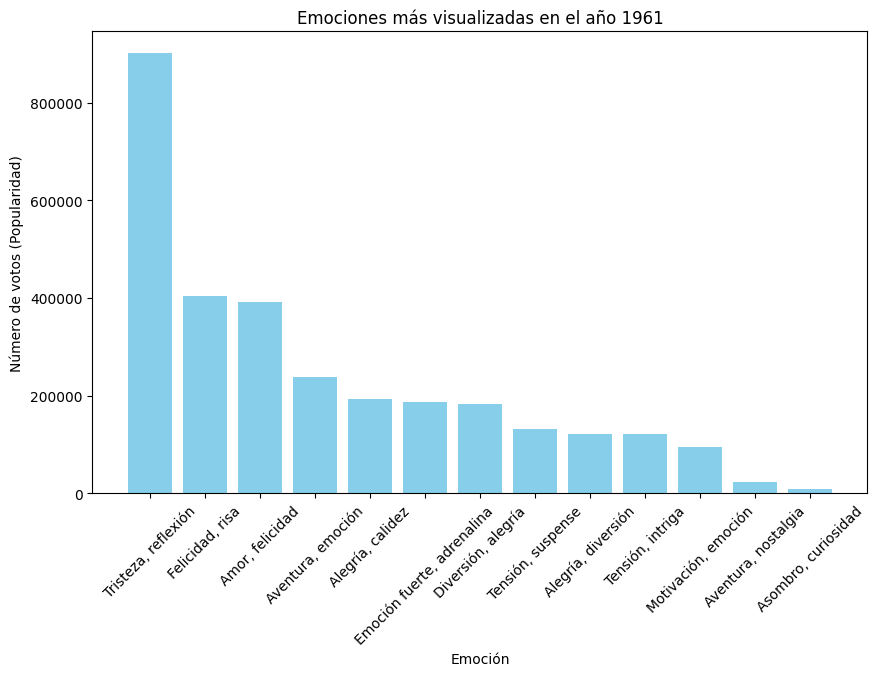

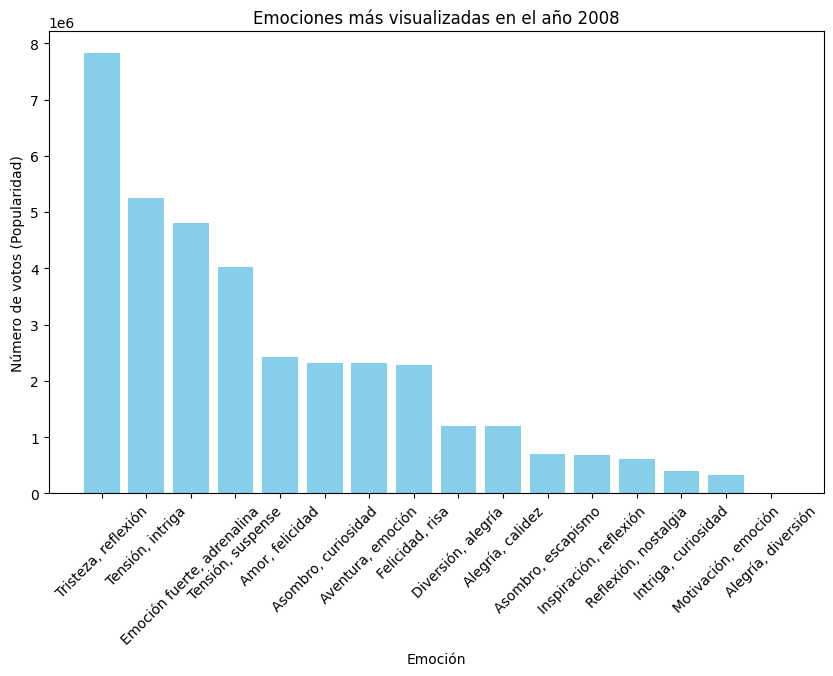

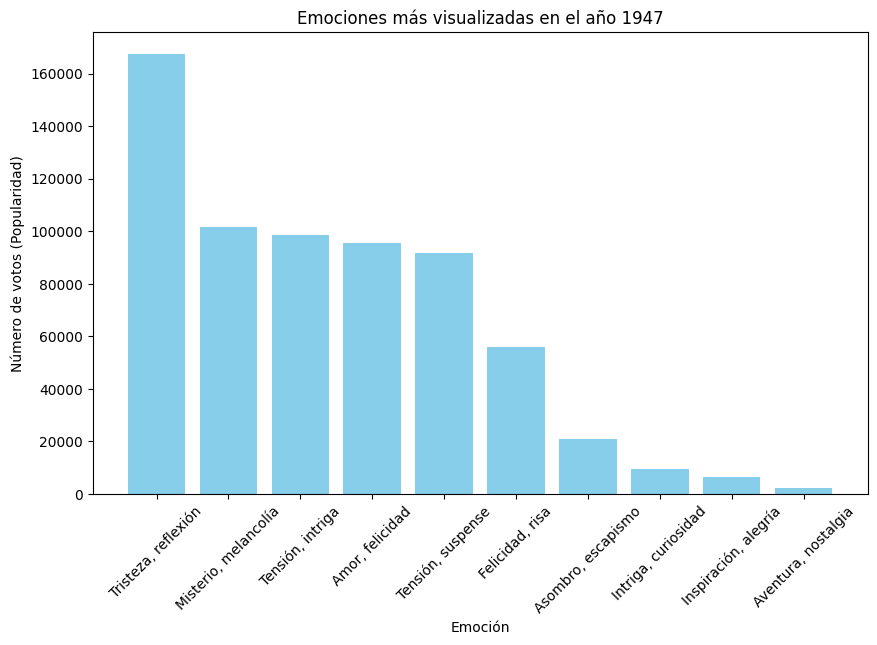

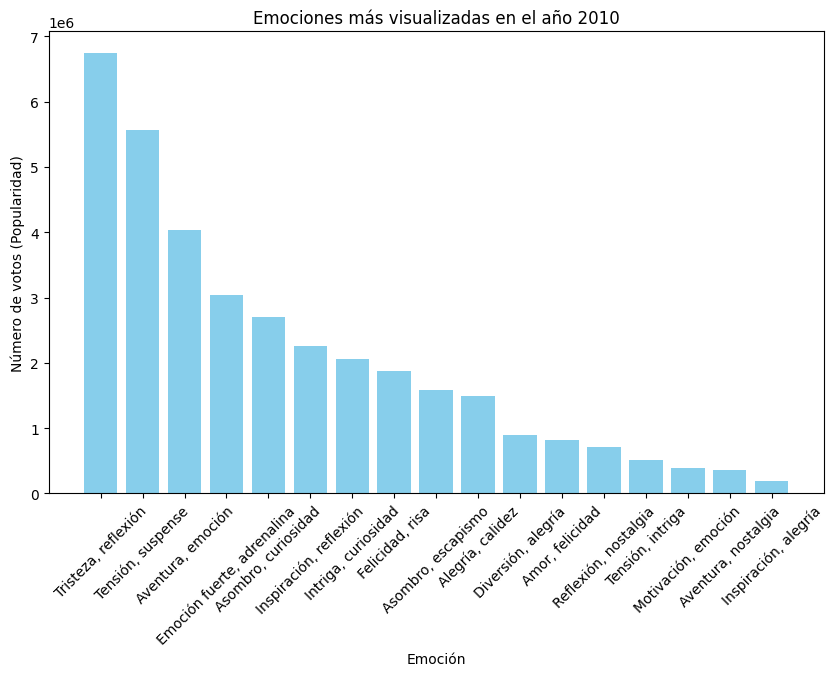

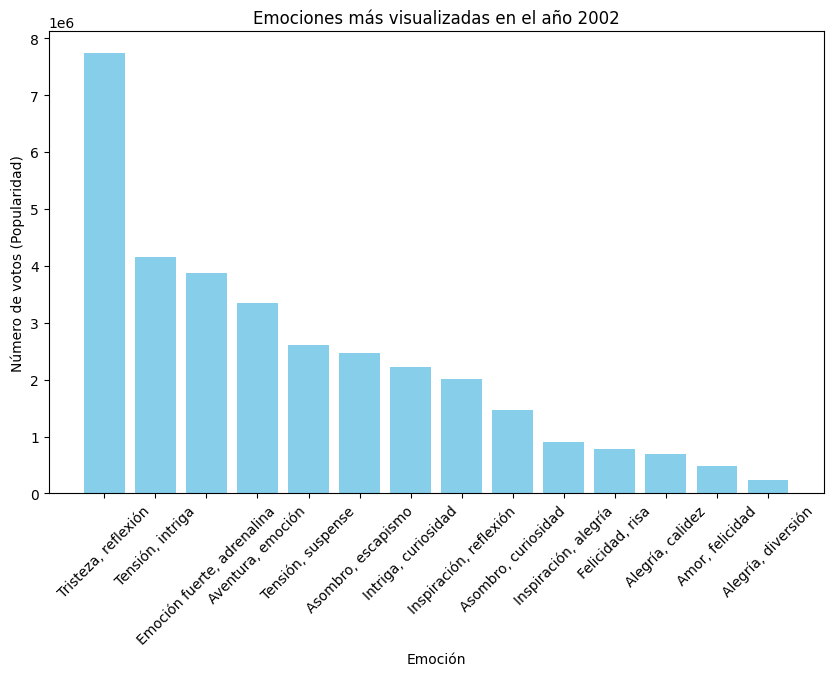

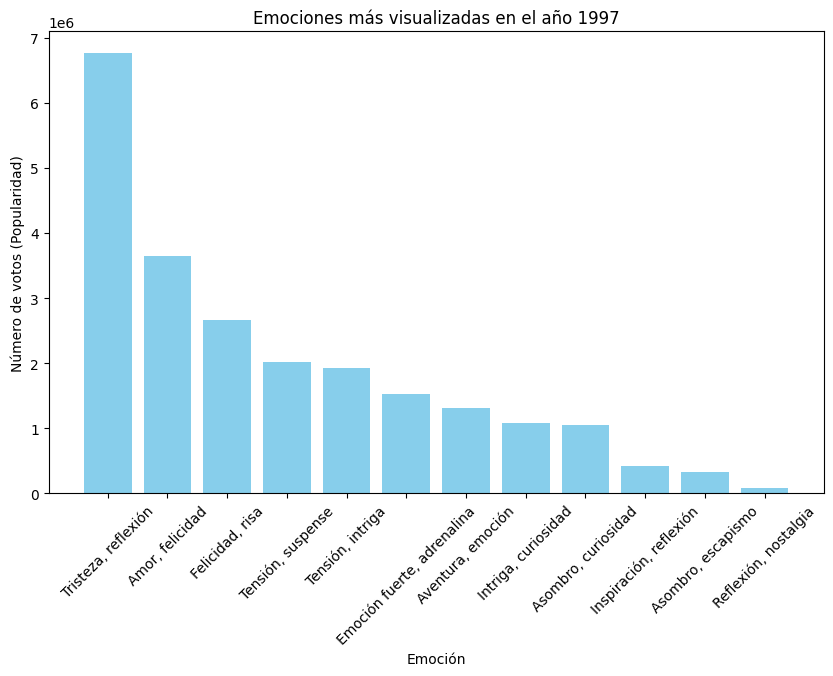

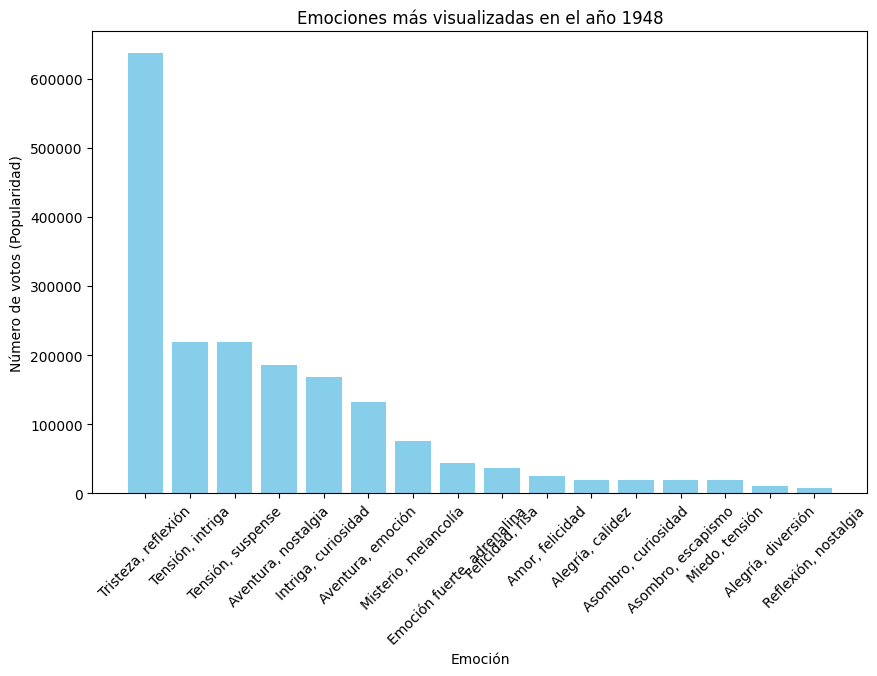

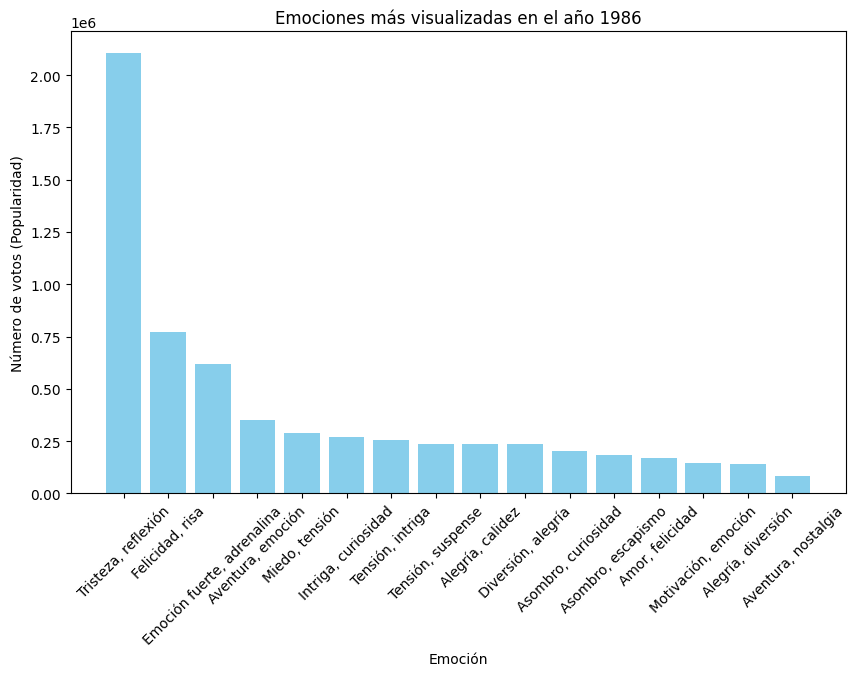

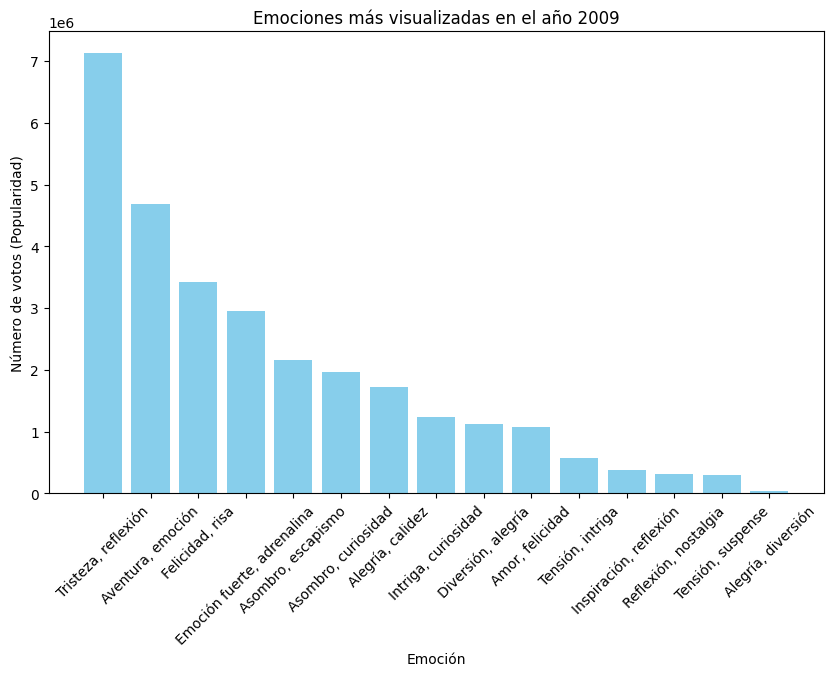

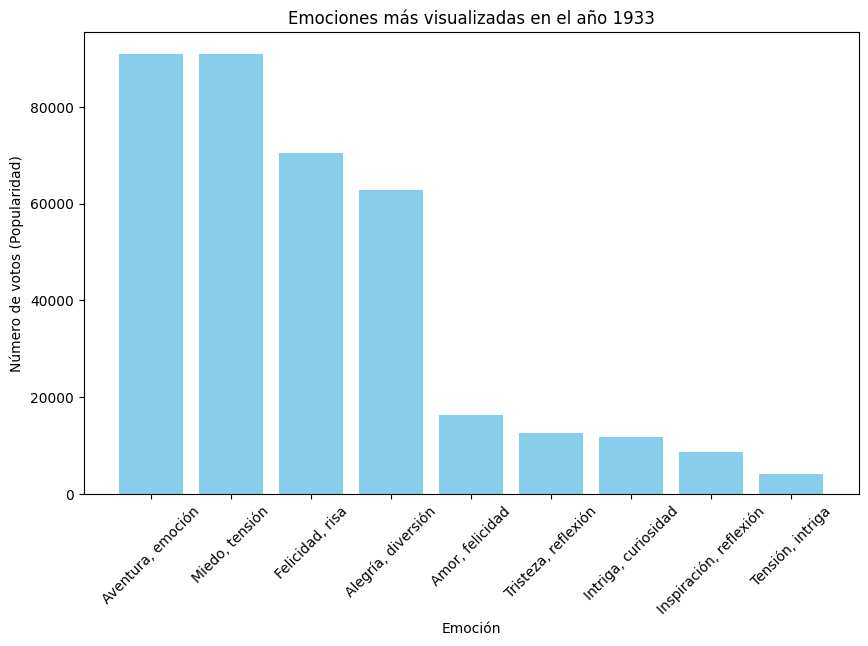

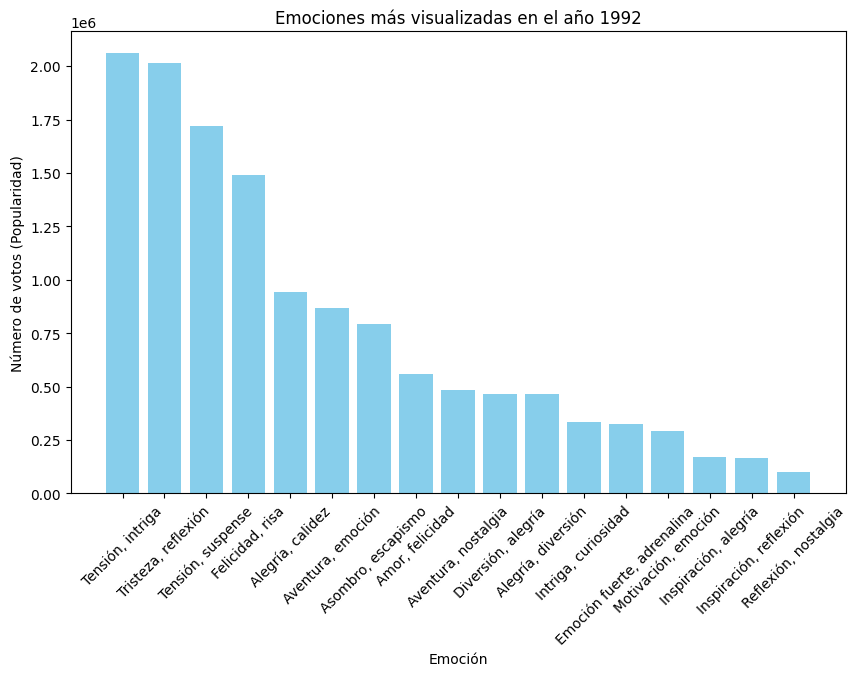

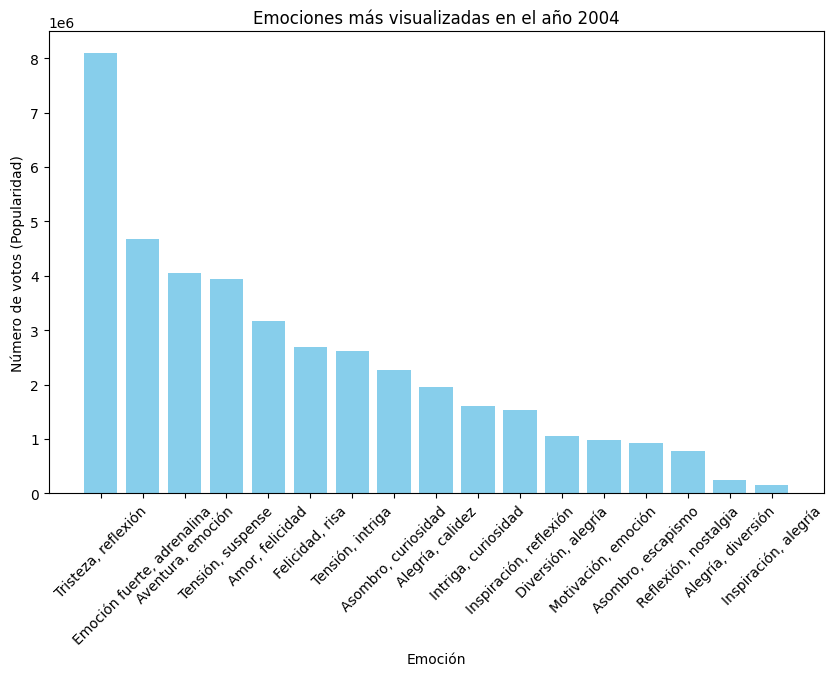

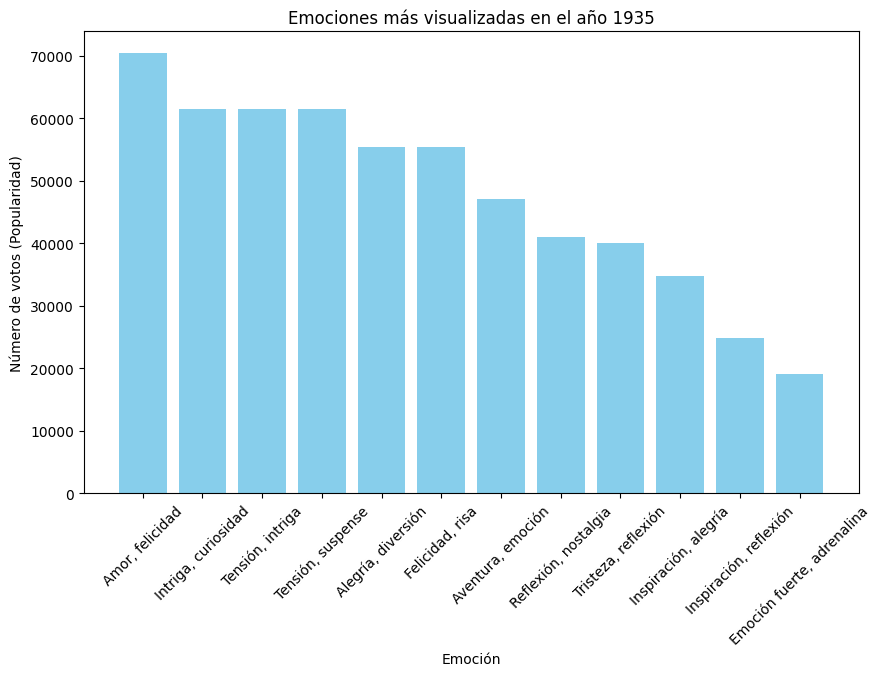

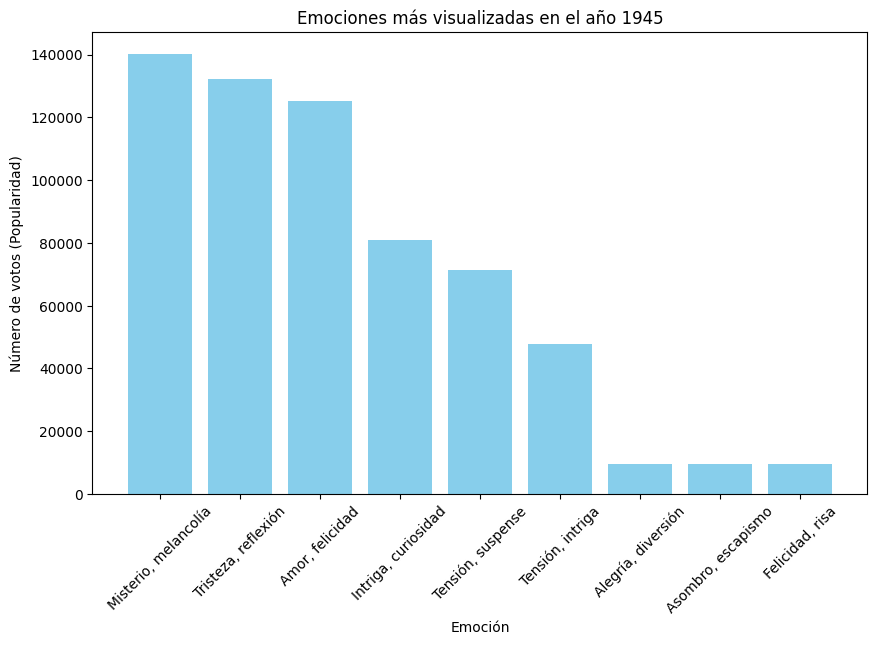

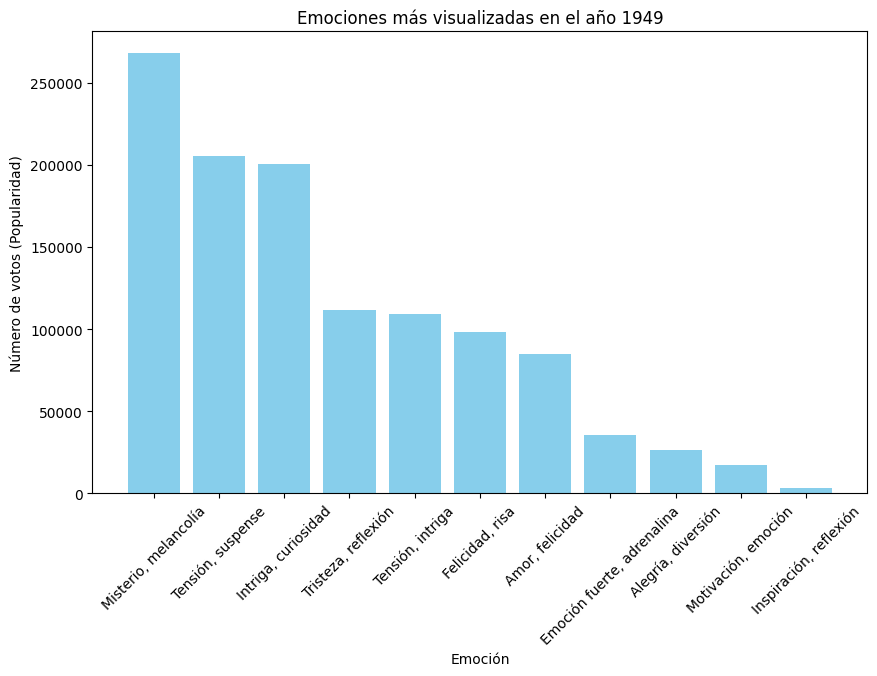

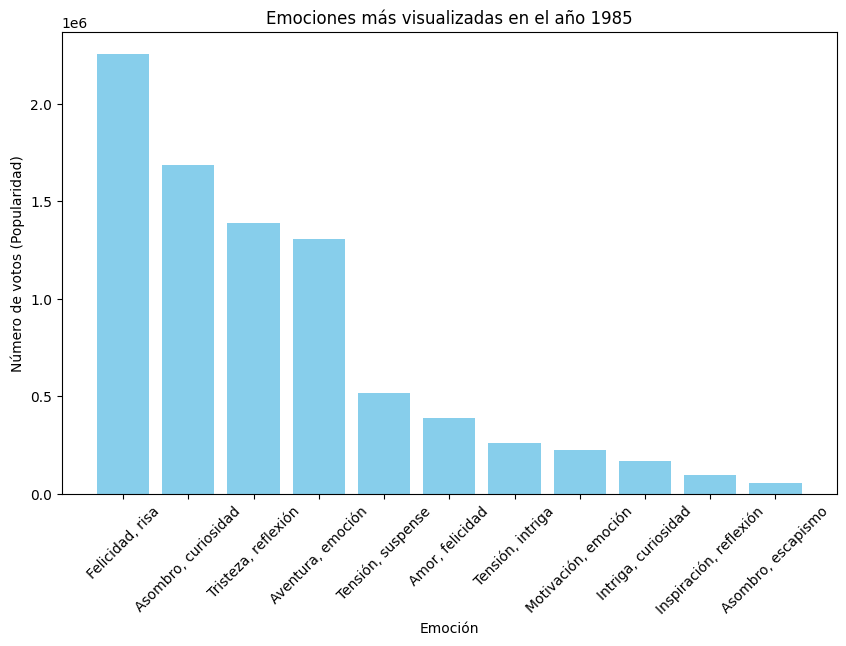

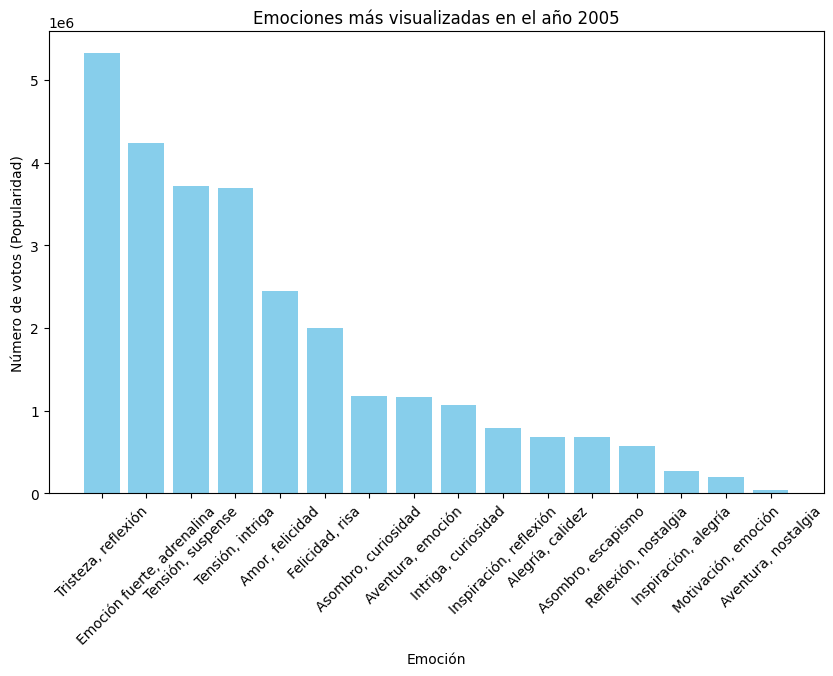

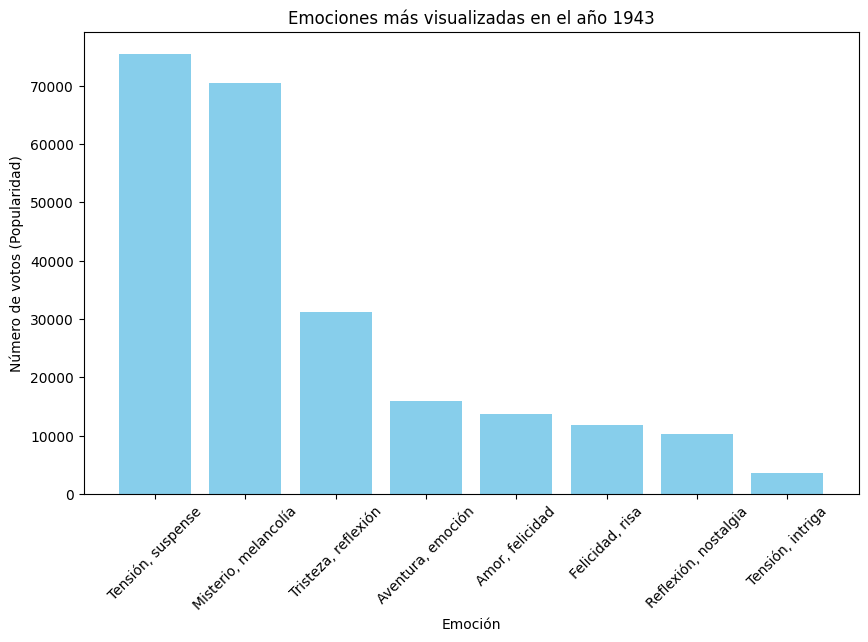

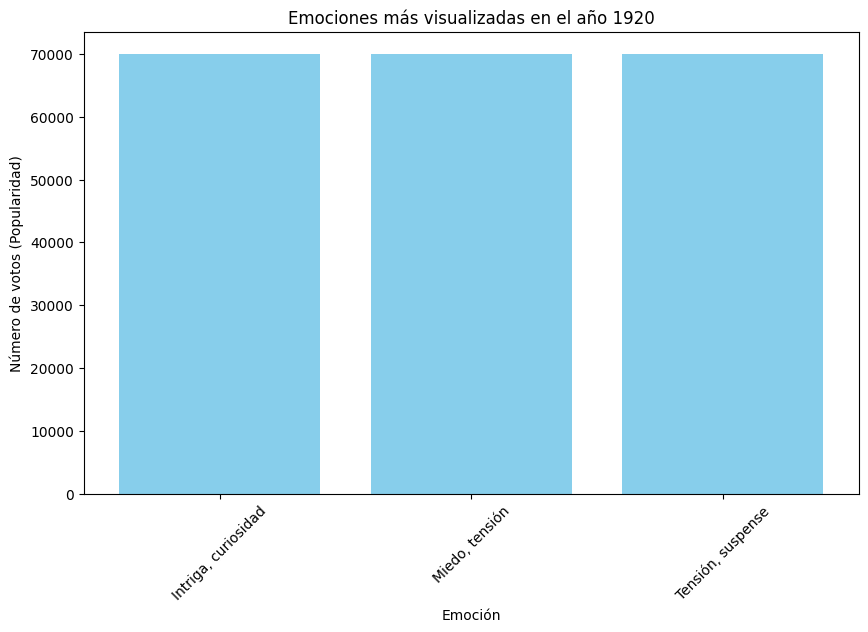

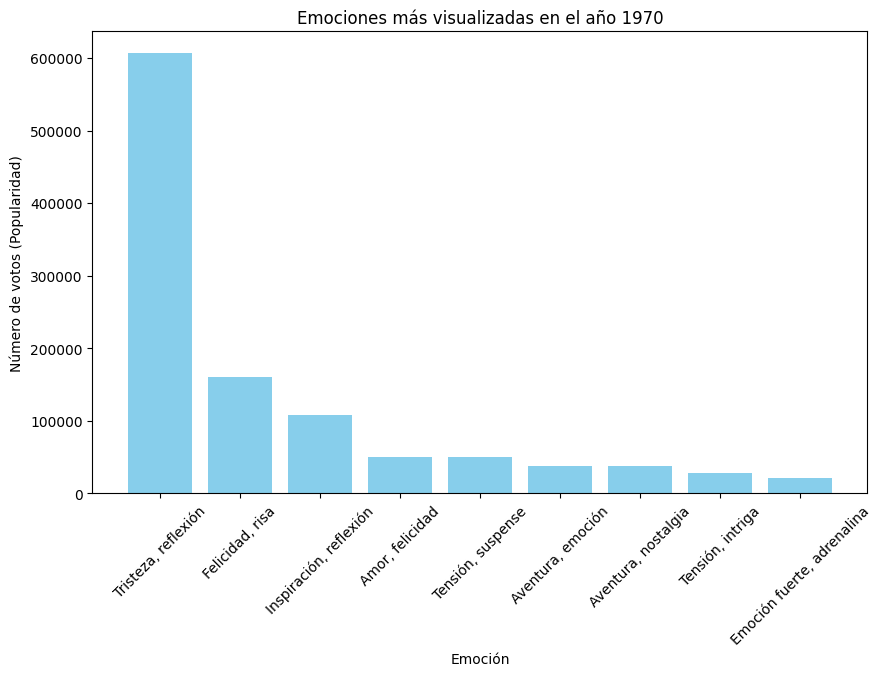

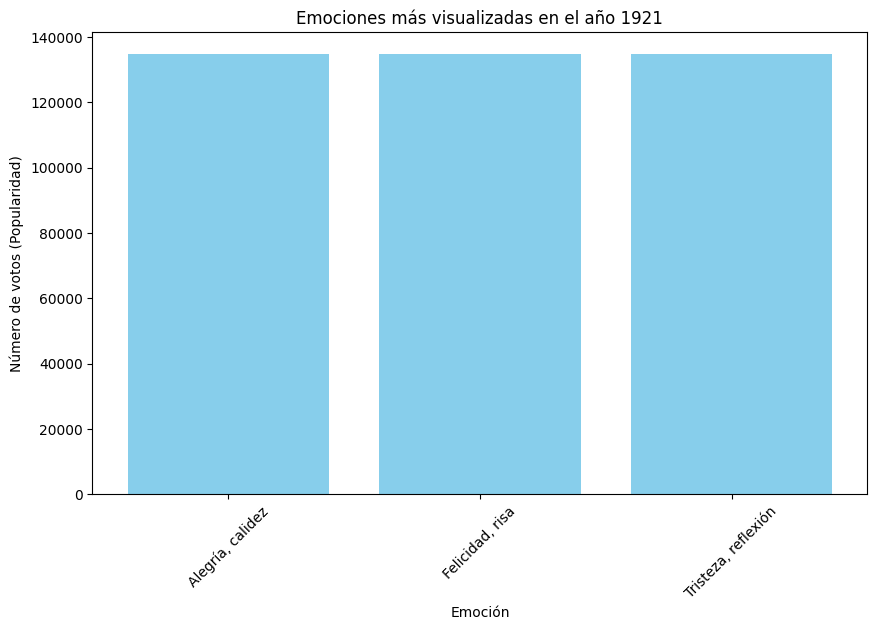

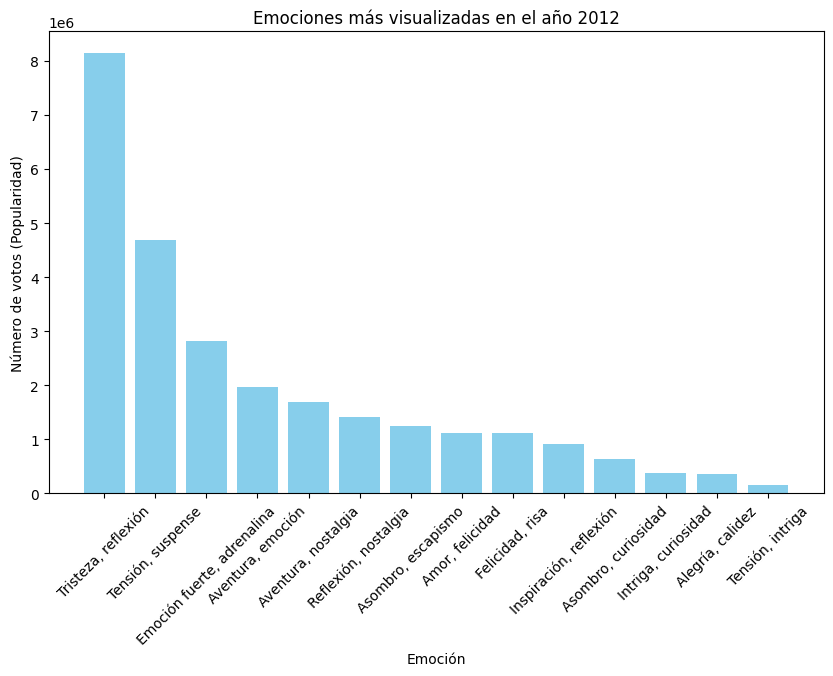

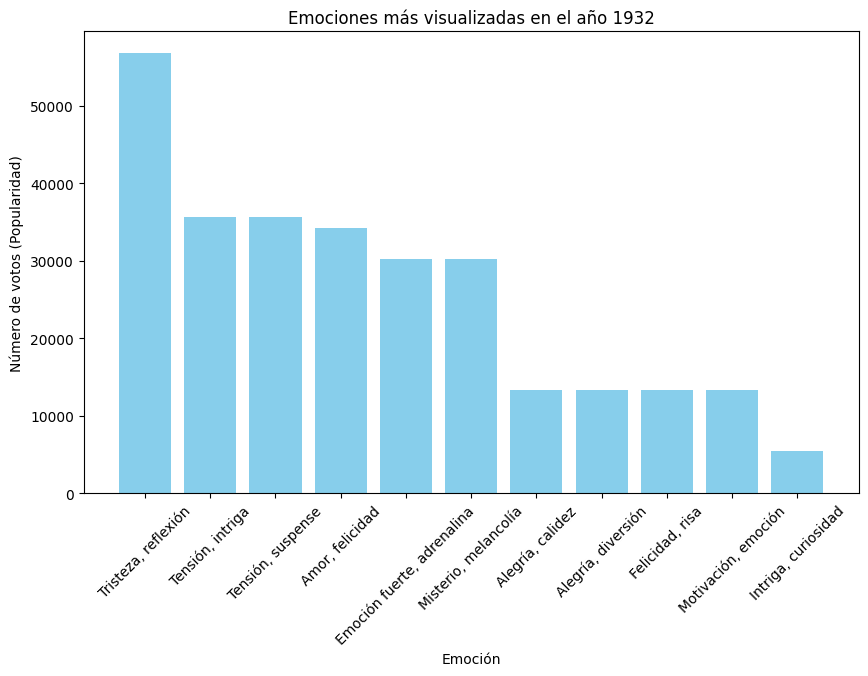

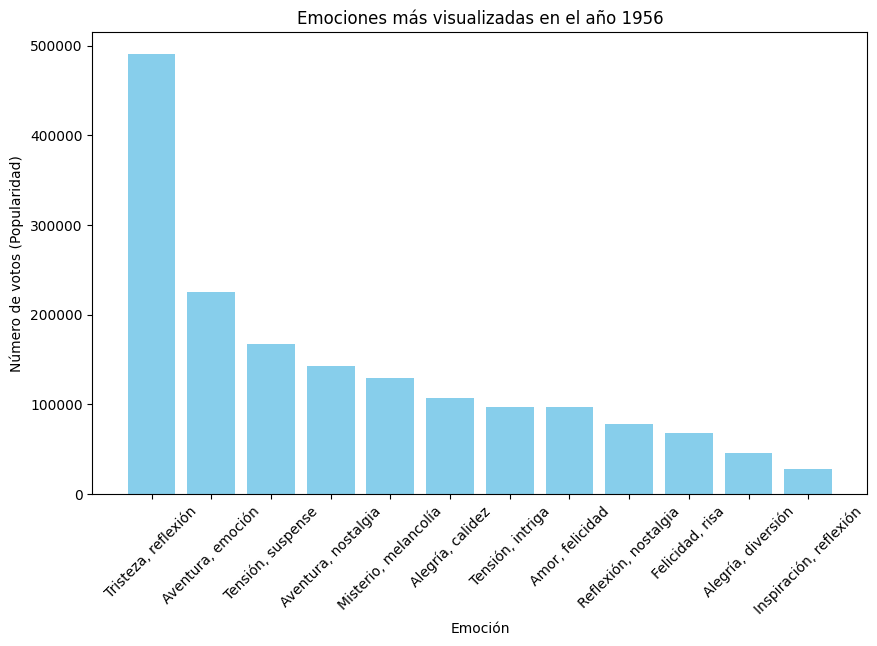

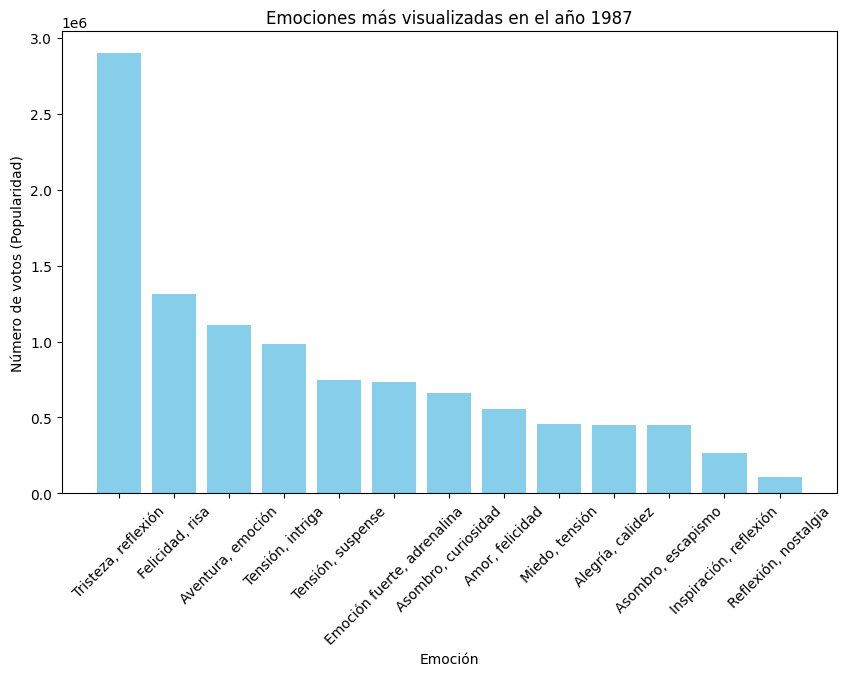

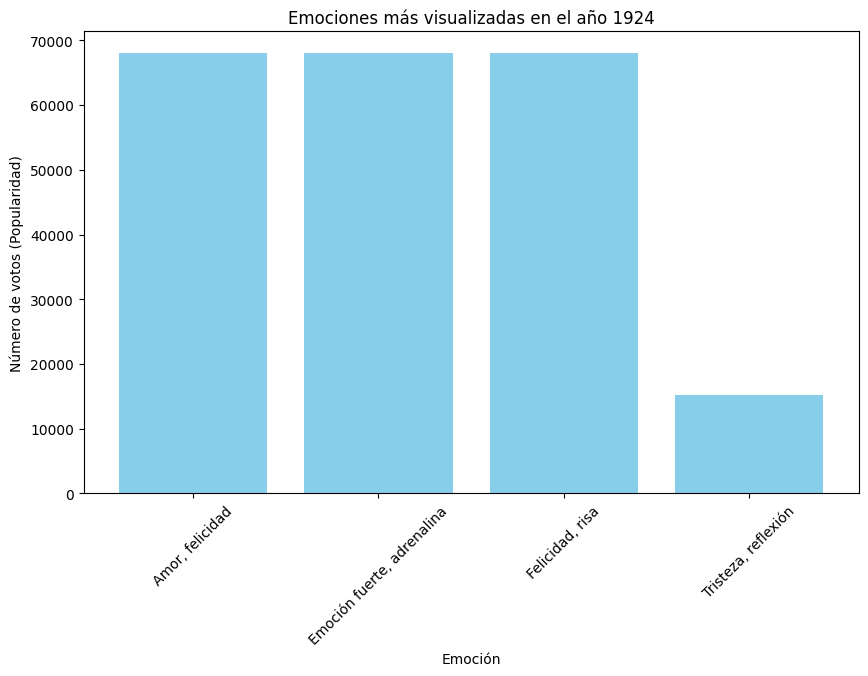

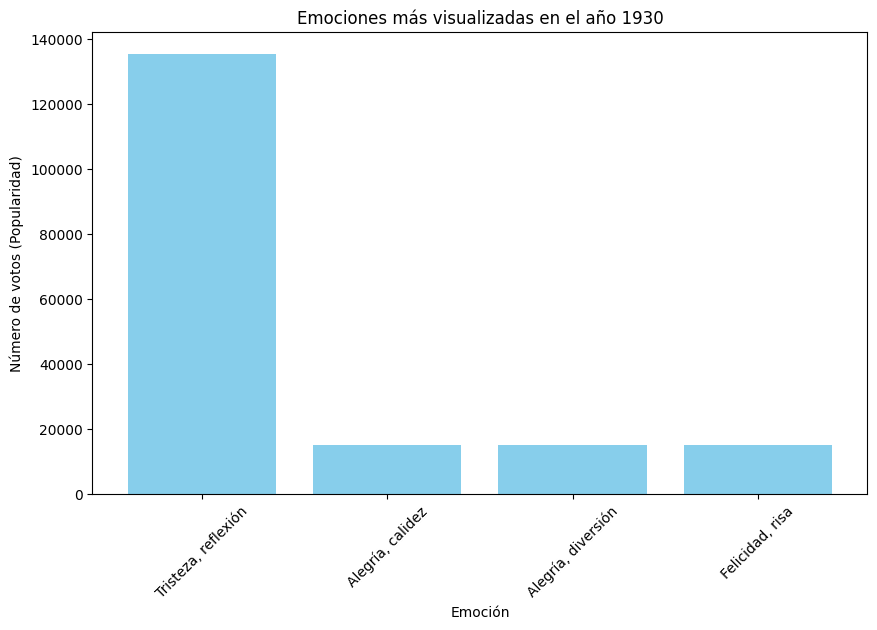

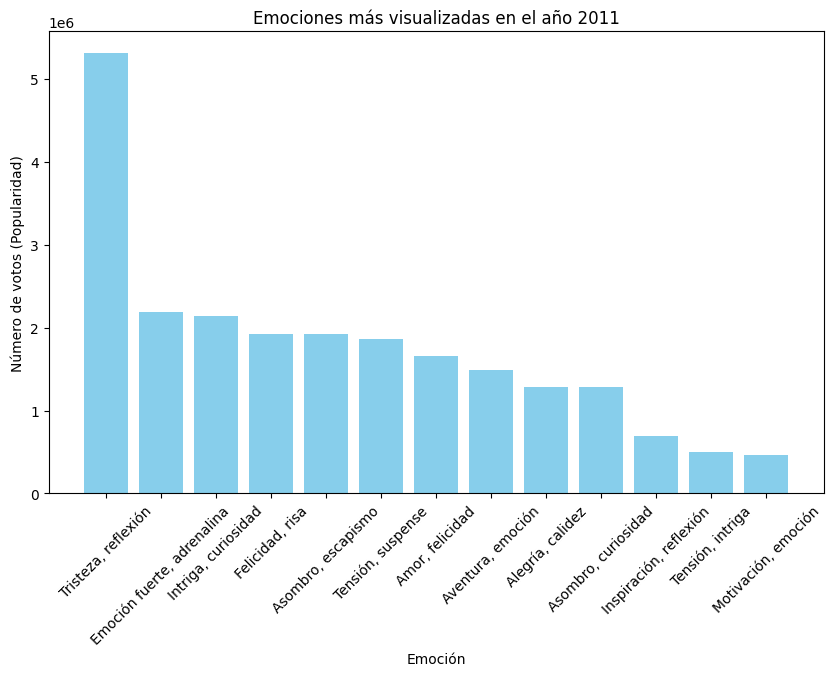

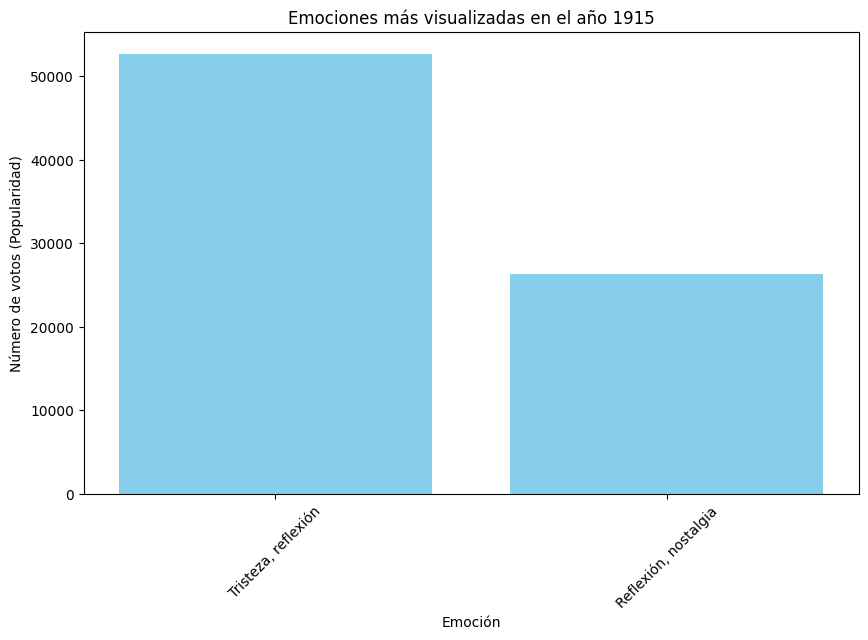

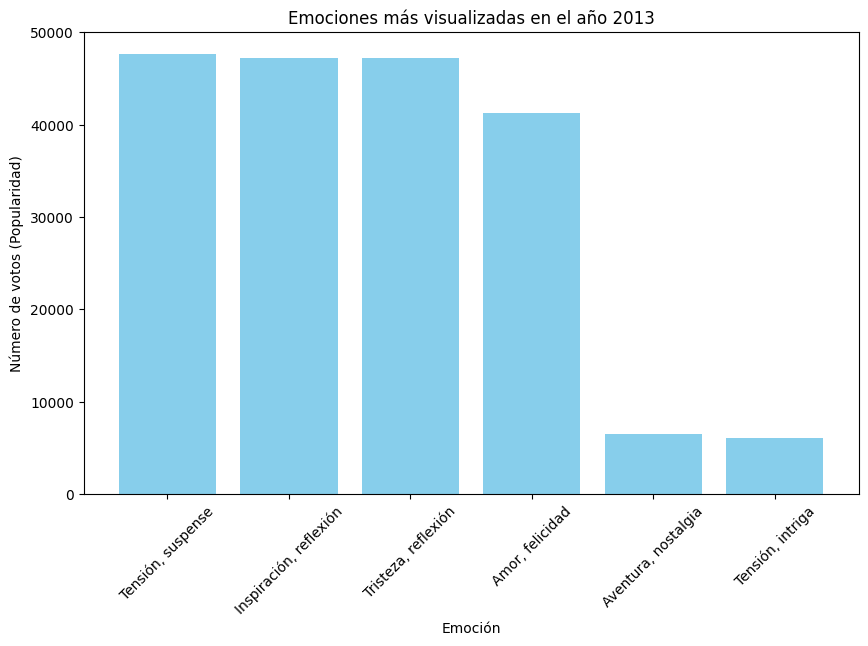

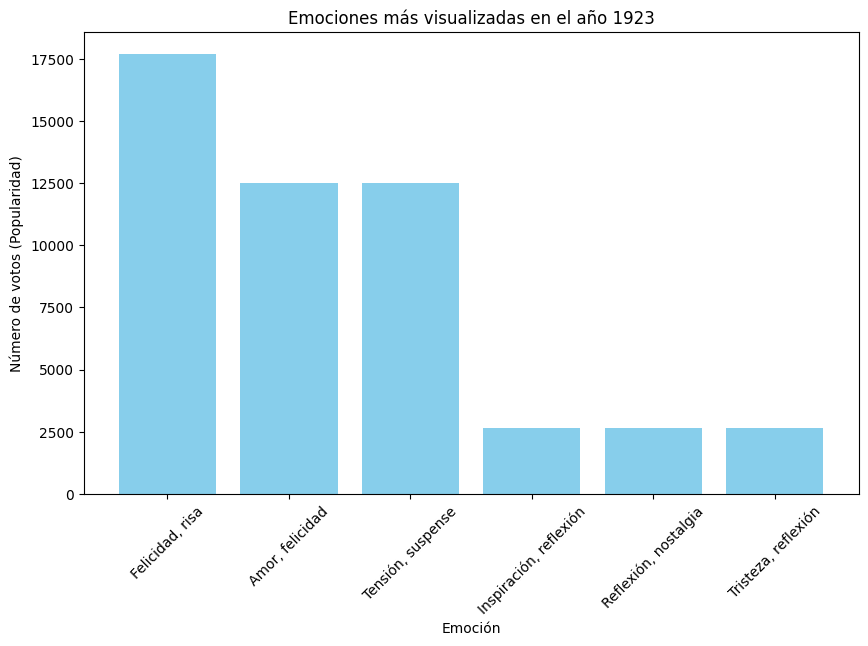

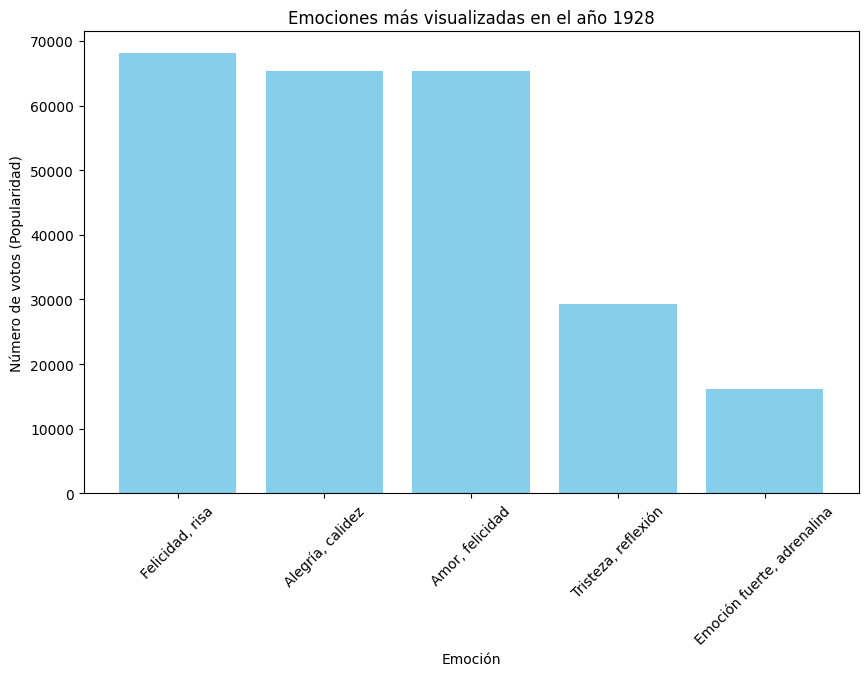

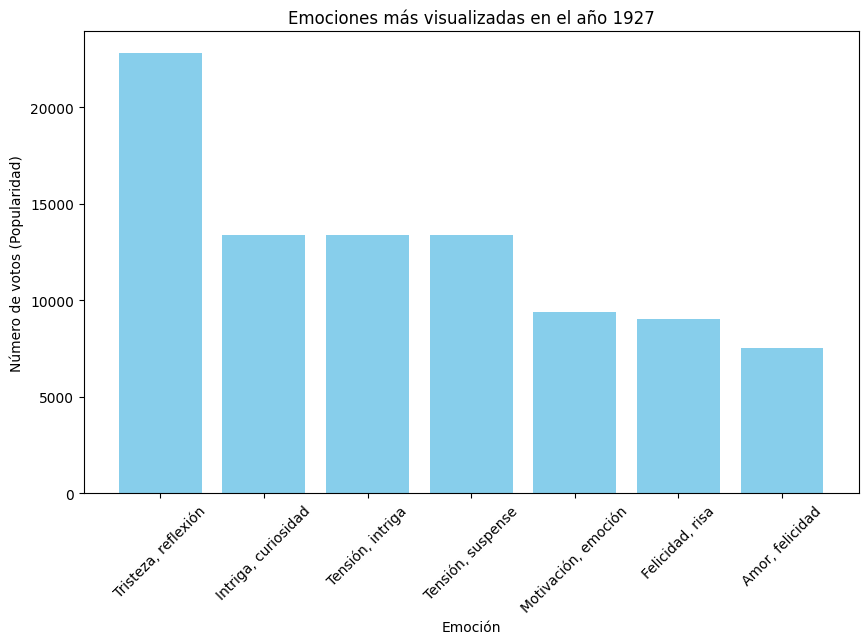

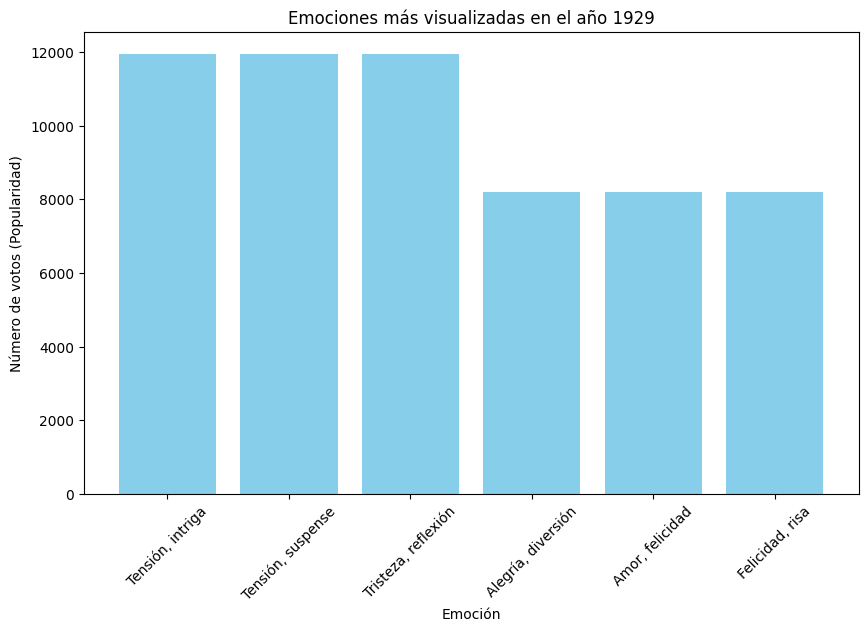

Top 5 emociones más visualizadas en el año 1994:
                          Mood  Num Votes
14         Tristeza, reflexión   10561699
12            Tensión, intriga    4210364
2              Amor, felicidad    2862222
6   Emoción fuerte, adrenalina    2622707
7              Felicidad, risa    2310578


In [17]:
# Expandir los géneros en filas separadas (ya que una película puede tener múltiples géneros)
df_expanded = df.assign(Genres=df['Genres'].str.split(',')).explode('Genres')

# Limpiar espacios en los géneros
df_expanded['Genres'] = df_expanded['Genres'].str.strip()

# Asignar emociones a cada género
df_expanded['Mood'] = df_expanded['Genres'].map(genre_to_mood)

# Obtener la lista de años únicos
unique_years = df_expanded['Year'].unique()

# Graficar las emociones más visualizadas por año en gráficas separadas
def plot_moods_by_year():
    for year in unique_years:
        if pd.notna(year):  # Ignorar valores NaN
            # Filtrar por año
            df_year = df_expanded[df_expanded['Year'] == year]

            # Agrupar por emociones y sumar los votos
            mood_popularity = df_year.groupby('Mood')['Num Votes'].sum().reset_index()

            # Ordenar por popularidad
            mood_popularity = mood_popularity.sort_values(by='Num Votes', ascending=False)

            # Crear la gráfica
            plt.figure(figsize=(10, 6))
            plt.bar(mood_popularity['Mood'], mood_popularity['Num Votes'], color='skyblue')
            plt.xlabel('Emoción')
            plt.ylabel('Número de votos (Popularidad)')
            plt.title(f'Emociones más visualizadas en el año {year}')
            plt.xticks(rotation=45)
            plt.show()

# Llamar a la función para graficar
plot_moods_by_year()

# Mostrar las emociones más visualizadas por año en formato de tabla
def top_moods_by_year(year, top_n=5):
    # Filtrar por año
    df_year = df_expanded[df_expanded['Year'] == year]

    # Agrupar por emociones y sumar los votos
    mood_popularity = df_year.groupby('Mood')['Num Votes'].sum().reset_index()

    # Ordenar por popularidad y seleccionar las top_n emociones
    top_moods = mood_popularity.sort_values(by='Num Votes', ascending=False).head(top_n)

    return top_moods

# Ejemplo: Mostrar las 5 emociones más visualizadas en un año específico
year = 1994  # Puedes cambiar este año
print(f"Top 5 emociones más visualizadas en el año {year}:")
print(top_moods_by_year(year))

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Supongamos que ya tienes df y genre_to_mood definidos

# Explotar la lista de emociones
df_exploded = df.explode('Mood')

# Crear una matriz de características usando CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_exploded['Mood'])

# Definir la variable objetivo (y)
y = df_exploded['Mood']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir los parámetros para GridSearchCV
parameters = {
    "max_depth": [4, 6, 8, 10, 12],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3],
    "random_state": [7, 23, 42, 78, 142],
    "min_impurity_decrease": [0.0, 0.05, 0.1, 0.2],
}
# Definir el estimador
estimador = DecisionTreeClassifier()

# Crear el modelo GridSearchCV
model2 = GridSearchCV(
    estimator=estimador,
    param_grid=parameters,
    cv=KFold(10),
    verbose=1,
    n_jobs=-1,
    refit=True
)

# Entrenar el modelo
model2.fit(x_train, y_train)

# Evaluar el modelo
y_pred = model2.predict(x_test)
print("Precisión del modelo: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Mejores parámetros encontrados: ", model2.best_params_)
# Función para recomendar películas basadas en la emoción
def recomendar_pelicula(emocion):
    # Convertir la emoción en una matriz de características
    emocion_vectorizada = vectorizer.transform([emocion])

    # Predecir la emoción
    emocion_predicha = model2.predict(emocion_vectorizada)[0]

    # Filtrar películas que coincidan con la emoción predicha
    peliculas_recomendadas = df_exploded[df_exploded['Mood'] == emocion_predicha]

    # Mostrar la precisión del modelo
    precision = accuracy_score(y_test, model2.predict(x_test))
    print(f"Precisión del modelo: {precision * 100:.2f}%")

    # Recomendar una película aleatoria
    if not peliculas_recomendadas.empty:
        pelicula_recomendada = peliculas_recomendadas.sample(1)
        print(f"Película recomendada: {pelicula_recomendada['Title'].values[0]}")
        print(f"Género: {pelicula_recomendada['Genres'].values[0]}")
        print(f"URL: {pelicula_recomendada['URL'].values[0]}")
    else:
        print("No se encontraron películas para la emoción ingresada.")

# Ejemplo de uso
emocion_usuario = input("Ingresa una emoción: ")
recomendar_pelicula(emocion_usuario)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precisión del modelo:  0.9894490035169988
                            precision    recall  f1-score   support

          Alegría, calidez       1.00      1.00      1.00        18
        Alegría, diversión       0.55      1.00      0.71        11
           Amor, felicidad       1.00      1.00      1.00        75
       Asombro, curiosidad       1.00      1.00      1.00        21
        Asombro, escapismo       1.00      1.00      1.00        20
         Aventura, emoción       1.00      1.00      1.00        48
       Aventura, nostalgia       1.00      1.00      1.00        13
        Diversión, alegría       0.00      0.00      0.00         9
Emoción fuerte, adrenalina       1.00      1.00      1.00        42
           Felicidad, risa       1.00      1.00      1.00       117
      Inspiración, alegría       1.00      1.00      1.00        12
    Inspiración, reflexión       1.00      1.00      1.00        23
       Intriga, curiosidad       1.00      1.00      1.00        33
     

In [19]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

In [20]:
print(f"La mejor combinacion de parametros es:\n {model2.best_params_}")

La mejor combinacion de parametros es:
 {'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 7, 'splitter': 'best'}


In [21]:
#fue la mejor de todas con un score de
print("la eficiencia de la IA con el modelo AUTOMATIZADO es: model2 = ",model2.best_score_)

la eficiencia de la IA con el modelo AUTOMATIZADO es: model2 =  0.9900232879075384


In [22]:
model2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=7)

In [23]:
from sklearn.metrics import accuracy_score
pred2 = model2.predict(x_test)
pred2

array(['Motivación, emoción', 'Tristeza, reflexión', 'Amor, felicidad',
       'Asombro, curiosidad', 'Tristeza, reflexión',
       'Tristeza, reflexión', 'Tristeza, reflexión', 'Aventura, emoción',
       'Tensión, suspense', 'Tristeza, reflexión', 'Tensión, intriga',
       'Felicidad, risa', 'Tensión, intriga', 'Amor, felicidad',
       'Amor, felicidad', 'Tristeza, reflexión', 'Felicidad, risa',
       'Felicidad, risa', 'Asombro, curiosidad', 'Amor, felicidad',
       'Tristeza, reflexión', 'Tristeza, reflexión', 'Felicidad, risa',
       'Emoción fuerte, adrenalina', 'Tristeza, reflexión',
       'Tensión, suspense', 'Emoción fuerte, adrenalina',
       'Reflexión, nostalgia', 'Asombro, escapismo', 'Felicidad, risa',
       'Amor, felicidad', 'Tristeza, reflexión', 'Felicidad, risa',
       'Tristeza, reflexión', 'Aventura, nostalgia', 'Felicidad, risa',
       'Intriga, curiosidad', 'Aventura, nostalgia',
       'Tristeza, reflexión', 'Amor, felicidad', 'Tensión, suspense',
    

In [24]:
accuracy_score(y_test,pred2)

0.9894490035169988

In [25]:
from sklearn.metrics import confusion_matrix
#pred1=model.predict(x_test)
pred2=model2.predict(x_test) # ya lo teniamos

#print(confusion_matrix(y_test,pred1))
print(confusion_matrix(y_test,pred2))

[[ 18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0  11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0  75   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0  21   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  20   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0  48   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0  13   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0  42   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 117   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0  12   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  23   0   0   0   0